# K-Means Algorithm을 이용한 생성과정

## 주성분 분석

In [87]:
import os
import pickle 
import sdv.metrics
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import time
from scipy.stats import multivariate_normal
import seaborn as sns

In [46]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HANBatang.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
import warnings

warnings.filterwarnings(action='ignore')

dirpath = "C:/Users/2jjsj/"

rawdata = pd.read_csv(dirpath + "2016_housemasterdata.csv" , encoding = 'CP949')

In [64]:
from sdv.tabular import CTGAN 

In [3]:
num_variable = ["MD제공용_가구고유번호","수도권여부" , "가구주_성별코드", "가구주_교육정도_학력코드" , "가구주_연령10세단위코드" , '경상소득(조사)', "경상소득_근로소득(조사)" , "경상소득_사업소득(조사)", "경상소득_재산소득(조사)" , "경상소득_공적이전소득(조사)" , "경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]"]

In [4]:
all_oridata = rawdata[num_variable] 

In [5]:
all_oridata.rename(columns = {"경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]" : "경상소득_사적이전소득(조사)"} , inplace = True)

In [6]:
all_ori_num_data = all_oridata.iloc[:,5:] # 경상소득(조사) 포함

In [10]:
all_ori_num_data

,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
0,9000,4000,5000,0,0,0
1,3216,3000,0,0,216,0
2,12600,12600,0,0,0,0
3,4560,0,4200,0,360,0
4,12420,12420,0,0,0,0
...,...,...,...,...,...,...
18268,1062,888,100,0,74,0
18269,288,0,0,40,248,0
18270,4540,4500,0,40,0,0
18271,2160,2160,0,0,0,0


In [7]:
non_ori_num_data = all_oridata.iloc[:,6:] # 경상소득(조사) 포함 x

In [11]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = non_ori_num_data.values # 독립변인들의 value값만 추출
y = all_ori_num_data['경상소득(조사)'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = [ "경상소득_근로소득(조사)" , "경상소득_사업소득(조사)", "경상소득_재산소득(조사)" , "경상소득_공적이전소득(조사)" , "경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]"]
pd.DataFrame(x, columns=features).head()

,경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]
0,0.285088,1.330985,-0.174635,-0.468810,-0.274709
1,0.004762,-0.379789,-0.174635,-0.139678,-0.274709
2,2.695891,-0.379789,-0.174635,-0.468810,-0.274709
3,-0.836216,1.057261,-0.174635,0.079743,-0.274709
4,2.645433,-0.379789,-0.174635,-0.468810,-0.274709


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2','principal component3','principal component4','principal component5'])

In [25]:
principalDf.head()

,principal component1,principal component2,principal component3,principal component4,principal component5
0,0.354987,1.103267,-0.685229,0.057370,0.602079
1,0.248362,-0.276360,-0.096443,-0.206013,-0.282726
2,2.319062,-0.710723,0.355790,0.206254,1.298273
3,-0.675051,1.003605,-0.587552,-0.347545,-0.021419
4,2.283365,-0.701686,0.344187,0.201876,1.266080


In [26]:
pca.explained_variance_ratio_

array([0.25990375, 0.2256526 , 0.20343413, 0.18688466, 0.12412486])

In [27]:
sum(pca.explained_variance_ratio_)

1.0

## K-means Clustering

In [146]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = all_ori_num_data

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)



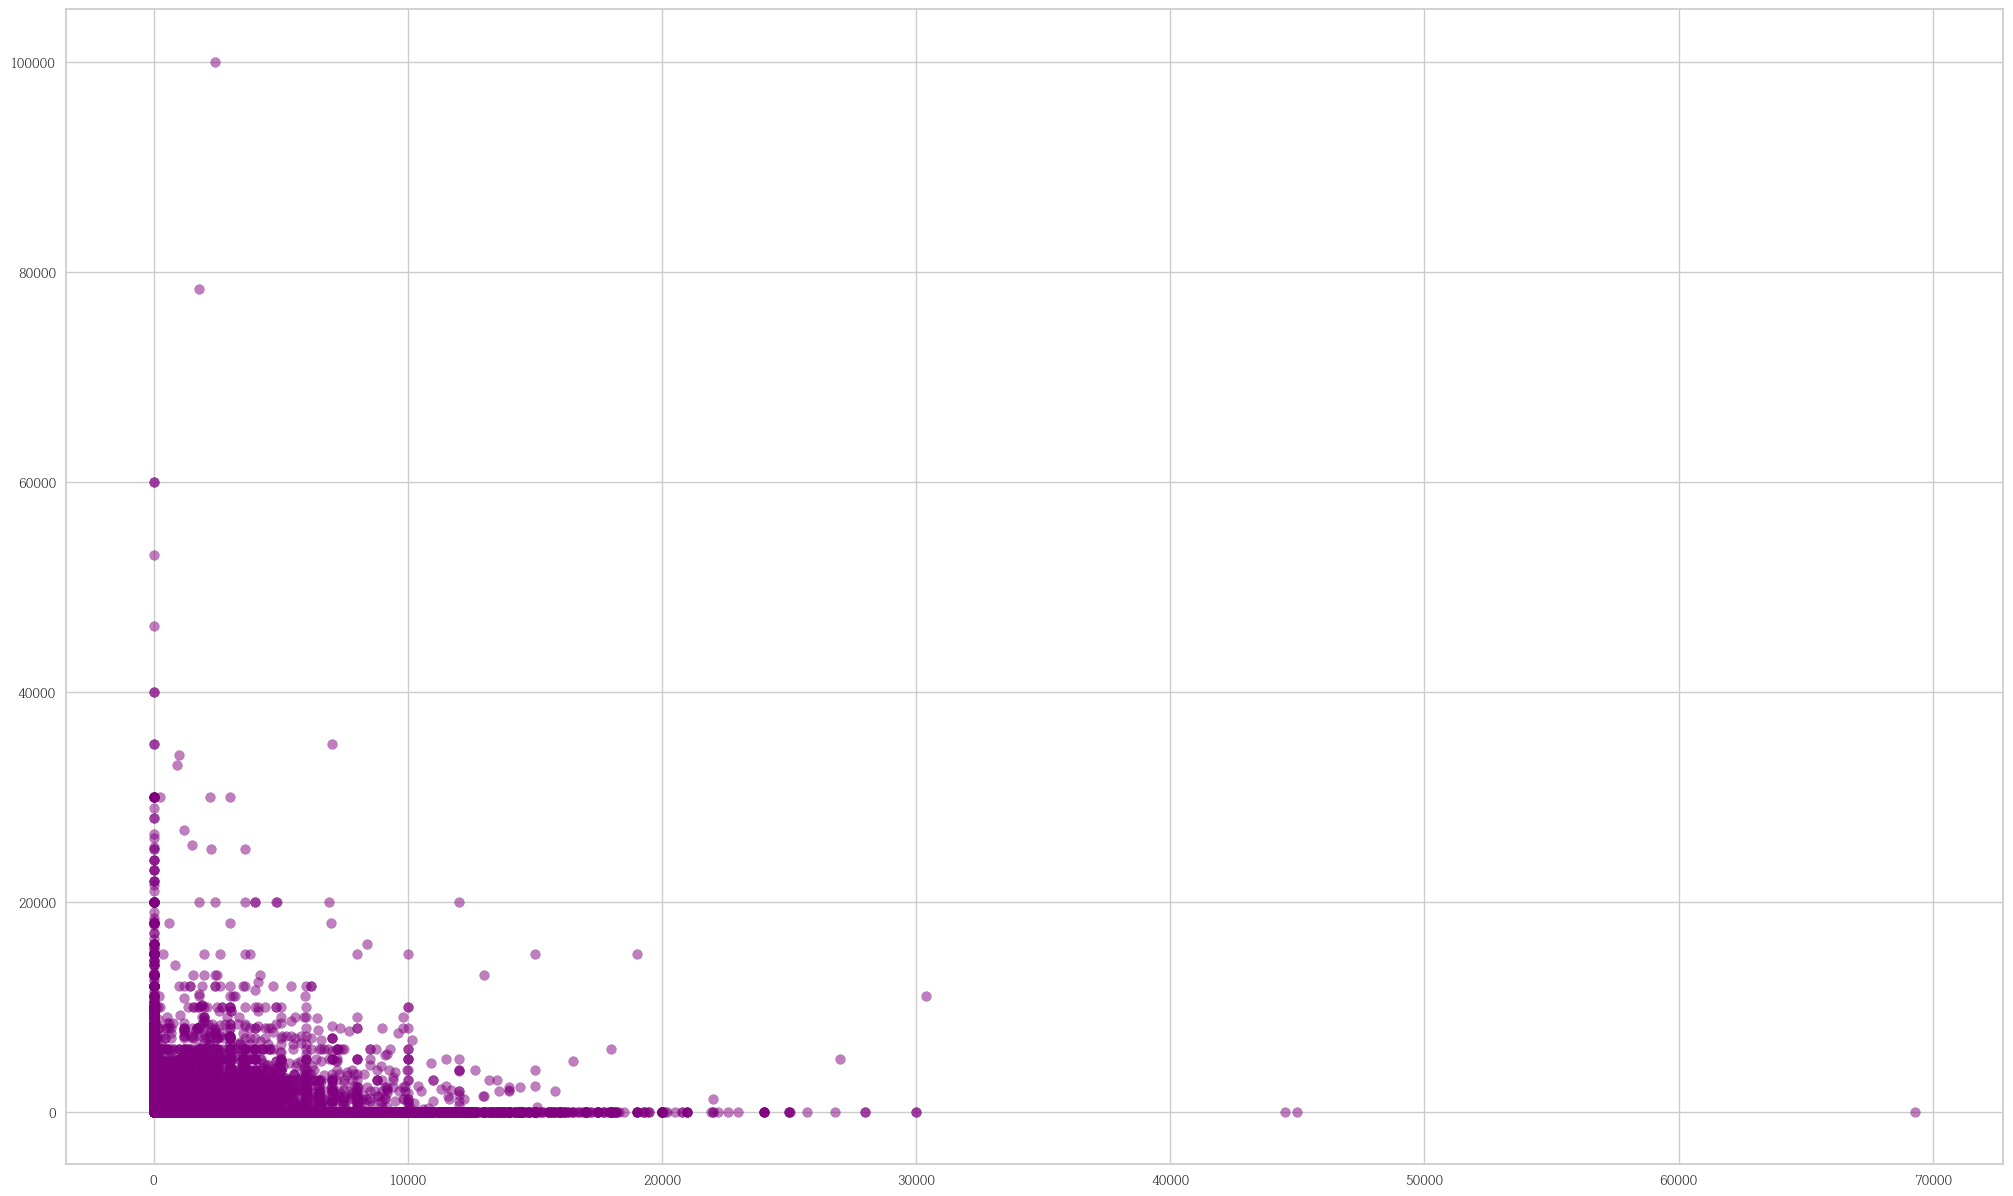

In [147]:
plt.scatter(all_ori_num_data['경상소득_근로소득(조사)'] , all_ori_num_data['경상소득_사업소득(조사)'] , color = 'purple' , alpha = 0.5)

In [211]:
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
all_oridata['cluster'] = model.fit_predict(data_scale)


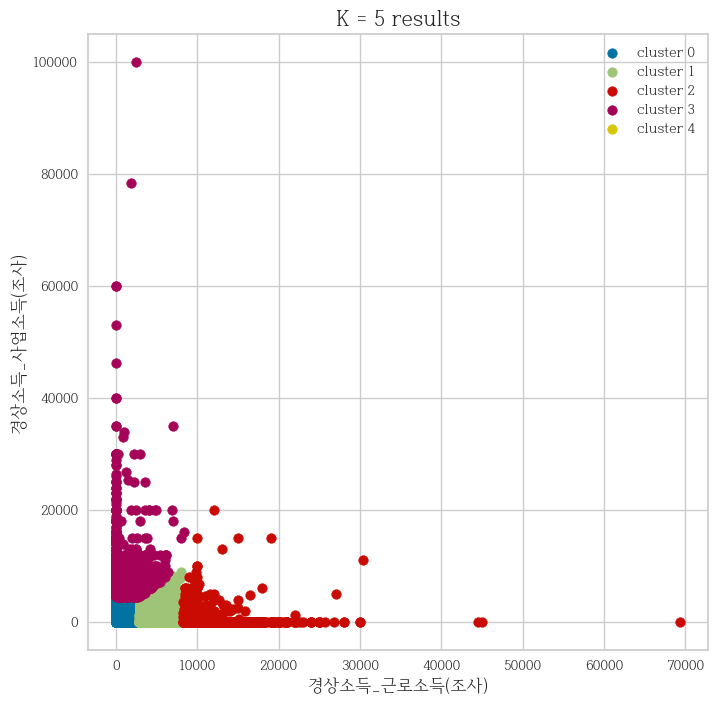

In [212]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(all_ori_num_data.loc[all_ori_num_data['cluster'] == i, '경상소득_근로소득(조사)'], all_ori_num_data.loc[all_ori_num_data['cluster'] == i, '경상소득_사업소득(조사)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('경상소득_근로소득(조사)', size = 12)
plt.ylabel('경상소득_사업소득(조사)', size = 12)
plt.show()

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

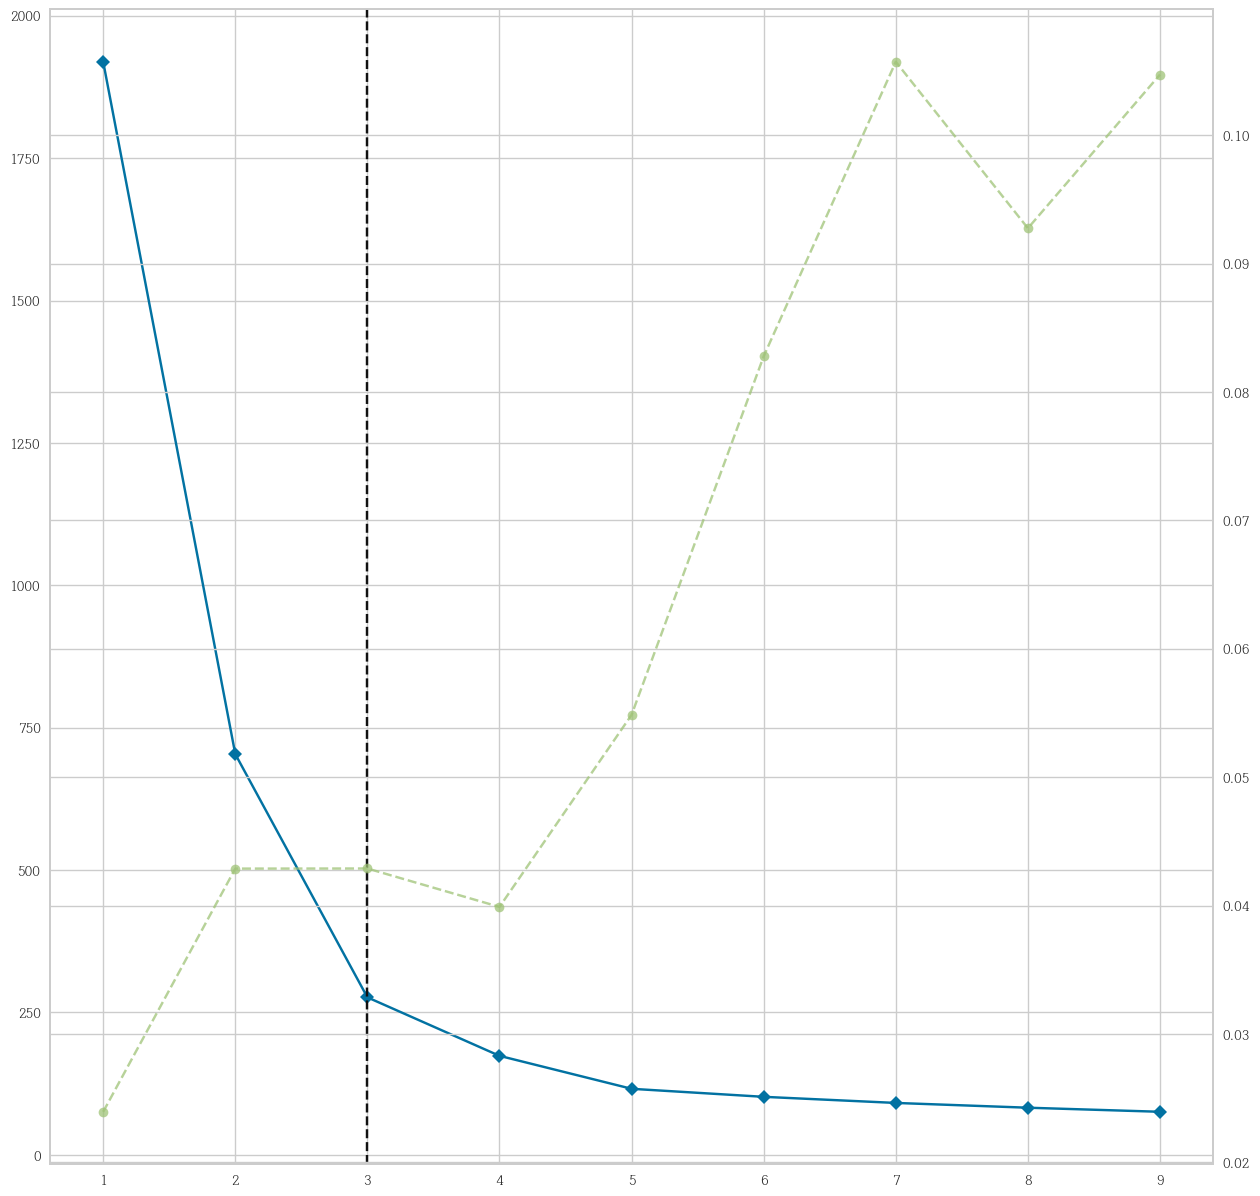

In [213]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [214]:
group1 = all_oridata[all_oridata['cluster'] == 0]
group2 = all_oridata[all_oridata['cluster'] == 1]
group3 = all_oridata[all_oridata['cluster'] == 2]
group4 = all_oridata[all_oridata['cluster'] == 3]
group5 = all_oridata[all_oridata['cluster'] == 4]

In [215]:
start = time.time()
myepoch = 40
    
sampling_count = len(group1) 
synthetic_data_group1 = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
synthetic_data_group1.fit(group1)  
all_synthetic_sample_group1 = synthetic_data_group1.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

38.46964 sec


In [216]:
start = time.time()
myepoch = 40
    
sampling_count = len(group2) 
synthetic_data_group2 = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
synthetic_data_group2.fit(group2)  
all_synthetic_sample_group2 = synthetic_data_group2.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

5.57396 sec


In [217]:
start = time.time()
myepoch = 40
    
sampling_count = len(group3) 
synthetic_data_group3 = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
synthetic_data_group3.fit(group3)  
all_synthetic_sample_group3 = synthetic_data_group3.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

23.86138 sec


In [218]:
start = time.time()
myepoch = 40
    
sampling_count = len(group4) 
synthetic_data_group4 = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
synthetic_data_group4.fit(group4)  
all_synthetic_sample_group4 = synthetic_data_group4.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

5.62583 sec


In [219]:
start = time.time()
myepoch = 40
    
sampling_count = len(group5) 
synthetic_data_group5 = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
synthetic_data_group5.fit(group5)  
all_synthetic_sample_group5 = synthetic_data_group5.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

2.31680 sec


In [220]:
all_group = pd.concat([all_synthetic_sample_group1 , all_synthetic_sample_group2 , all_synthetic_sample_group3,all_synthetic_sample_group4 , all_synthetic_sample_group5] , axis=0)

In [261]:
def statistic(original_data , synthetic_data , variable):
    
    if isinstance(original_data , pd.DataFrame) : # original_data가 단일 데이터인지 아닌지 여부
        
        results = np.zeros((7 , 3))
        
        # 원자료들에 대한 기초통계량 
        
        results[0 , 0] = original_data[variable].mean()
        results[1 , 0] = original_data[variable].std()
        results[2 , 0] = np.quantile(original_data[variable], q=0.25)
        results[3 , 0] = np.quantile(original_data[variable], q=0.50)
        results[4 , 0] = np.quantile(original_data[variable], q=0.75)
        results[5 , 0] = np.quantile(original_data[variable], q=0.90)
        results[6 , 0] = np.quantile(original_data[variable], q=0.99)
        
        # 재현자료에 대한 기초통계량 
        
        results[0 , 1] = synthetic_data[variable].mean()
        results[1 , 1] = synthetic_data[variable].std()
        results[2 , 1] = np.quantile(synthetic_data[variable], q=0.25)
        results[3 , 1] = np.quantile(synthetic_data[variable], q=0.50)
        results[4 , 1] = np.quantile(synthetic_data[variable], q=0.75)
        results[5 , 1] = np.quantile(synthetic_data[variable], q=0.90)
        results[6 , 1] = np.quantile(synthetic_data[variable], q=0.99)
        
        # 편차에 대한 기초통계량 

        results[0 , 2] = results[0 , 0] - results[0 , 1] 
        results[1 , 2] = results[1 , 0] - results[1 , 1]
        results[2 , 2] = results[2 , 0] - results[2 , 1]
        results[3 , 2] = results[3 , 0] - results[3 , 1]
        results[4 , 2] = results[4 , 0] - results[4 , 1]
        results[5 , 2] = results[5 , 0] - results[5 , 1]
        results[6 , 2] = results[6 , 0] - results[6 , 1]

        
        tabular = pd.DataFrame(data = results , columns = ['원자료에 대한 기초통계량','재현자료에 대한 기초통계량','편차에 대한 기초통계량'],
                                        index = ['평균', '표준편차', '25%', '50%', '75%', '90%', '99%'])
        
        
        
    elif isinstance(original_data , list): # original_data가 리스트안에 여러 리스트로 이루어진 다수 데이터일 경우     
        
        num_datasets = len(original_data)
        results = np.zeros((3, num_datasets , 7))
        
        for i in range(num_datasets) :
            
            # 원자료들에 대한 기초통계량 
        
            results[0, i ,0] = original_data[i][variable].mean()
            results[0, i ,1] = original_data[i][variable].std()
            results[0, i ,2] = np.quantile(original_data[i][variable], q=0.25)
            results[0, i ,3] = np.quantile(original_data[i][variable], q=0.50)
            results[0, i ,4] = np.quantile(original_data[i][variable], q=0.75)
            results[0, i ,5] = np.quantile(original_data[i][variable], q=0.90)
            results[0, i ,6] = np.quantile(original_data[i][variable], q=0.99)
            
            # 재현자료에 대한 기초통계량 
        
            results[1, i ,0] = synthetic_data[i][variable].mean()
            results[1, i ,1] = synthetic_data[i][variable].std()
            results[1, i ,2] = np.quantile(synthetic_data[i][variable], q=0.25)
            results[1, i ,3] = np.quantile(synthetic_data[i][variable], q=0.50)
            results[1, i ,4] = np.quantile(synthetic_data[i][variable], q=0.75)
            results[1, i ,5] = np.quantile(synthetic_data[i][variable], q=0.90)
            results[1, i ,6] = np.quantile(synthetic_data[i][variable], q=0.99)
            
            # 편차에 대한 기초통계량 
 
            results[2, i ,0] = results[1, i ,0] - results[0, i ,0]
            results[2, i ,1] = results[1, i ,1] - results[0, i ,1]
            results[2, i ,2] = results[1, i ,2] - results[0, i ,2]
            results[2, i ,3] = results[1, i ,3] - results[0, i ,3]
            results[2, i ,4] = results[1, i ,4] - results[0, i ,4]
            results[2, i ,5] = results[1, i ,5] - results[0, i ,5]
            results[2, i ,6] = results[1, i ,6] - results[0, i ,6]
            
            
            original_mean = np.mean(results[0, : ,:] , axis = 0)
            original_std = np.std(results[0, : , :] , axis = 0)
            
            synthetic_mean = np.mean(results[1, : ,:] , axis = 0)
            synthetic_std = np.std(results[1, : , :] , axis = 0)
            
            bias_mean = np.mean(results[2, : ,:] , axis = 0)
            bias_std = np.std(results[2, : , :] , axis = 0)
            
            
            
            tabular = pd.DataFrame({'original_statistic_mean': original_mean, 'original_statistic_std': original_std , 
                                    'synthetic_statistic_mean': synthetic_mean, 'synthetic_statistic_std': synthetic_std, 
                                    'bias_statistic_mean' : bias_mean , 'bias_statistic_std' : bias_std},
                        index=['평균', '표준편차', '25%', '50%', '75%', '90%', '99%'])
            
    
       
    return tabular

In [262]:
statistic(all_oridata , all_group , '경상소득(조사)')

,원자료에 대한 기초통계량,재현자료에 대한 기초통계량,편차에 대한 기초통계량
평균,4714.715920,5565.990587,-851.274668
표준편차,4468.386053,5290.231167,-821.845113
25%,1800.000000,2425.000000,-625.000000
50%,3704.000000,4219.000000,-515.000000
75%,6300.000000,6718.000000,-418.000000
90%,9600.000000,11538.400000,-1938.400000
99%,20000.000000,22519.200000,-2519.200000


In [255]:
all_group

,MD제공용_가구고유번호,수도권여부,가구주_성별코드,가구주_교육정도_학력코드,가구주_연령10세단위코드,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사),cluster
0,0,G1,2,4,G4,4977,2887,40,6,0,165,0
1,1,G1,1,4,G4,1633,1566,728,6,207,0,0
2,2,G1,2,5,G3,5138,2749,1,6,0,0,0
3,3,G2,2,1,G5,1950,10,0,80,444,47,0
4,4,G1,1,5,G2,3500,1696,1189,4,269,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
517,517,G1,1,6,G2,3098,0,93,40,2573,43,4
518,518,G2,1,6,G5,2942,0,159,6,3163,21,4
519,519,G2,1,6,G5,3226,321,0,124,2218,41,4
520,520,G2,1,4,G5,5964,240,70,3827,2766,44,4


In [93]:
start = time.time()
myepoch = 40
    
sampling_count = len(all_oridata) 
synthetic_data = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
synthetic_data.fit(all_oridata)  
all_synthetic_sample = synthetic_data.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

85.80132 sec


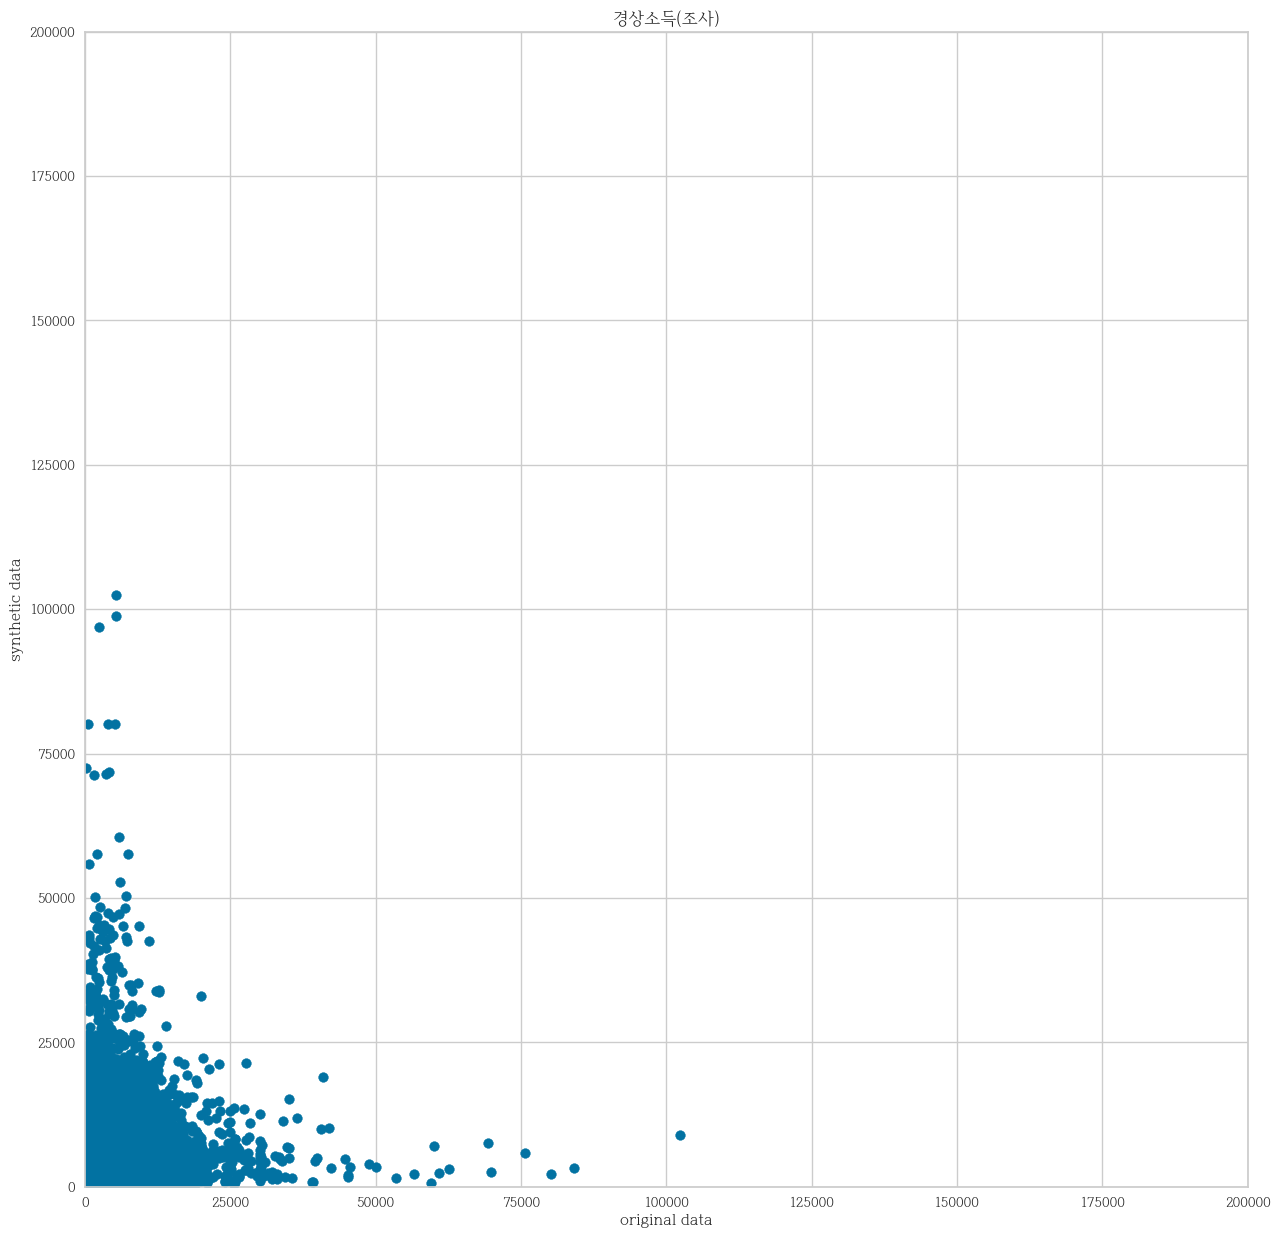

In [222]:
plt.scatter(all_oridata['경상소득(조사)'],all_group['경상소득(조사)'])
plt.title('경상소득(조사)')
plt.xlim(0,200000)
plt.ylim(0,200000)
plt.xlabel("original data")
plt.ylabel("synthetic data")
plt.show()

([<matplotlib.axis.XTick at 0x2c0c66f76d0>,
 [Text(1, 0, 'original_data'), Text(2, 0, 'synthetic_data')])

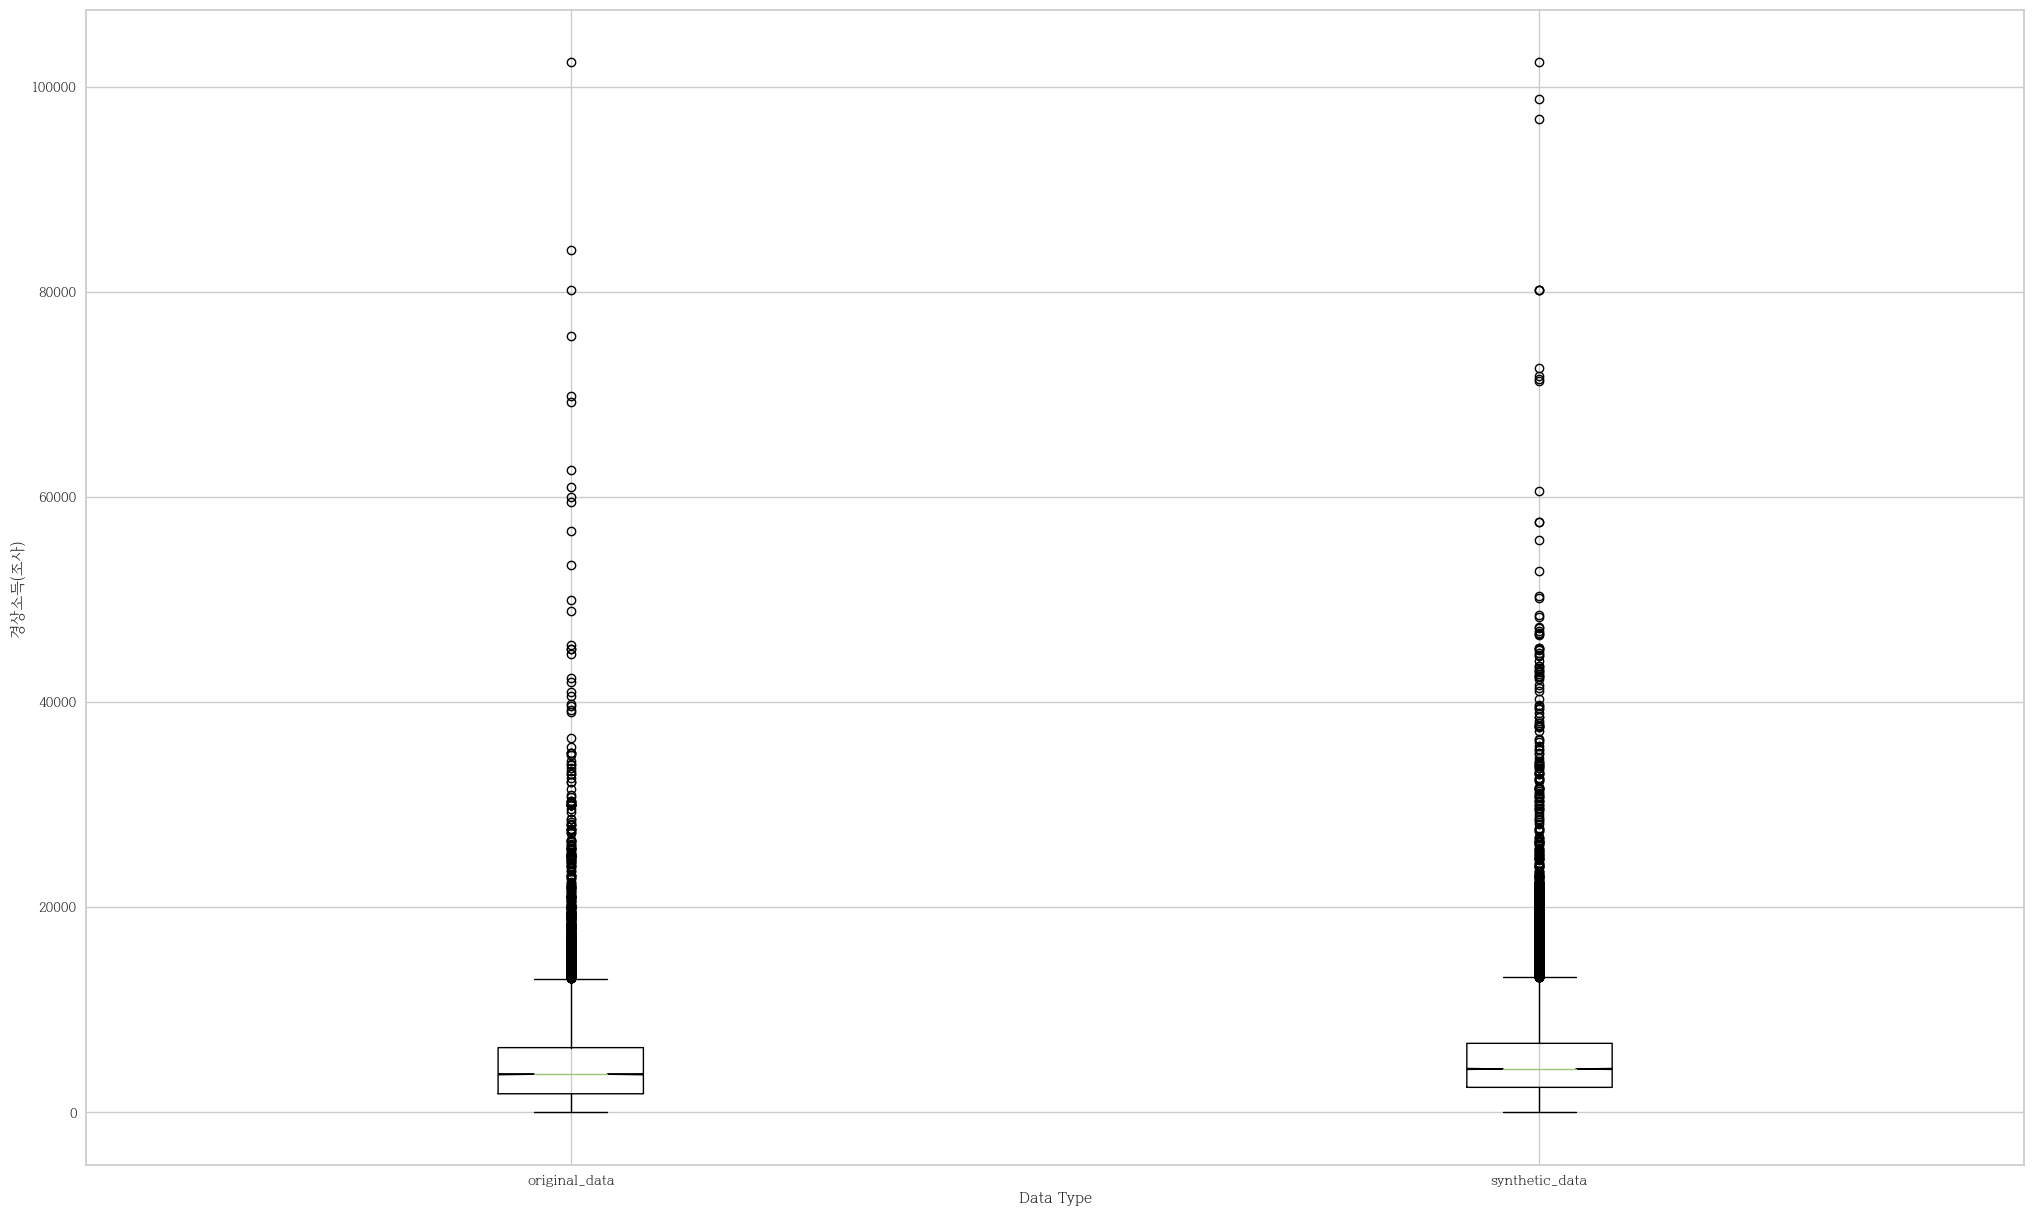

In [223]:
plt.rcParams['figure.figsize'] = [25, 15]
fig, ax = plt.subplots()
ax.boxplot([all_oridata['경상소득(조사)'],all_group['경상소득(조사)']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('경상소득(조사)')
plt.xticks([1,2], ['original_data','synthetic_data'])

([<matplotlib.axis.XTick at 0x2c0b14d2850>,
 [Text(1, 0, 'original_data'), Text(2, 0, 'synthetic_data')])

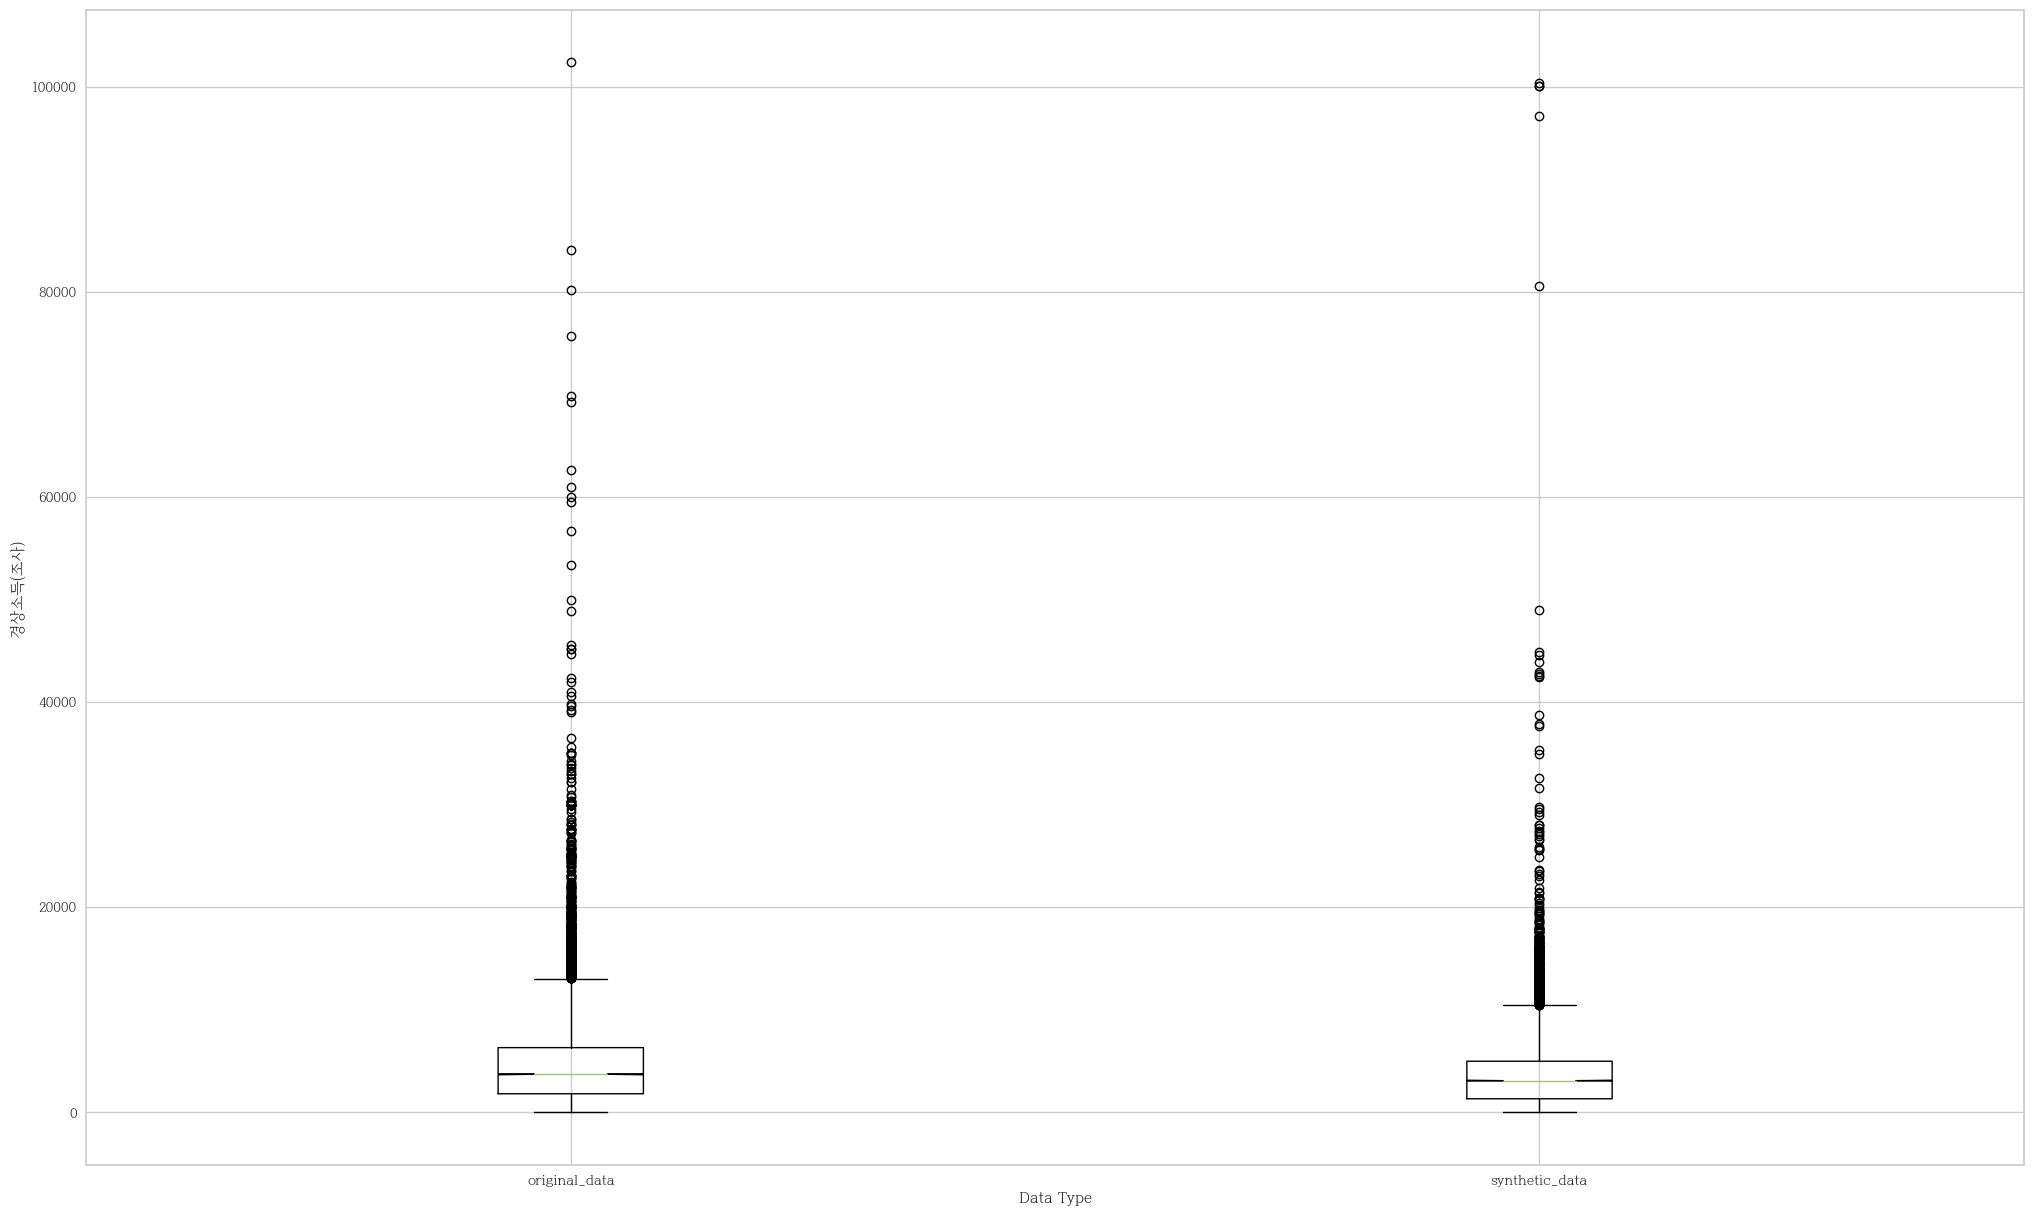

In [166]:
plt.rcParams['figure.figsize'] = [25, 15]
fig, ax = plt.subplots()
ax.boxplot([all_oridata['경상소득(조사)'],except_group['경상소득(조사)']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('경상소득(조사)')
plt.xticks([1,2], ['original_data','synthetic_data'])

([<matplotlib.axis.XTick at 0x2c0c6772f10>,
 [Text(1, 0, 'original_data'), Text(2, 0, 'synthetic_data')])

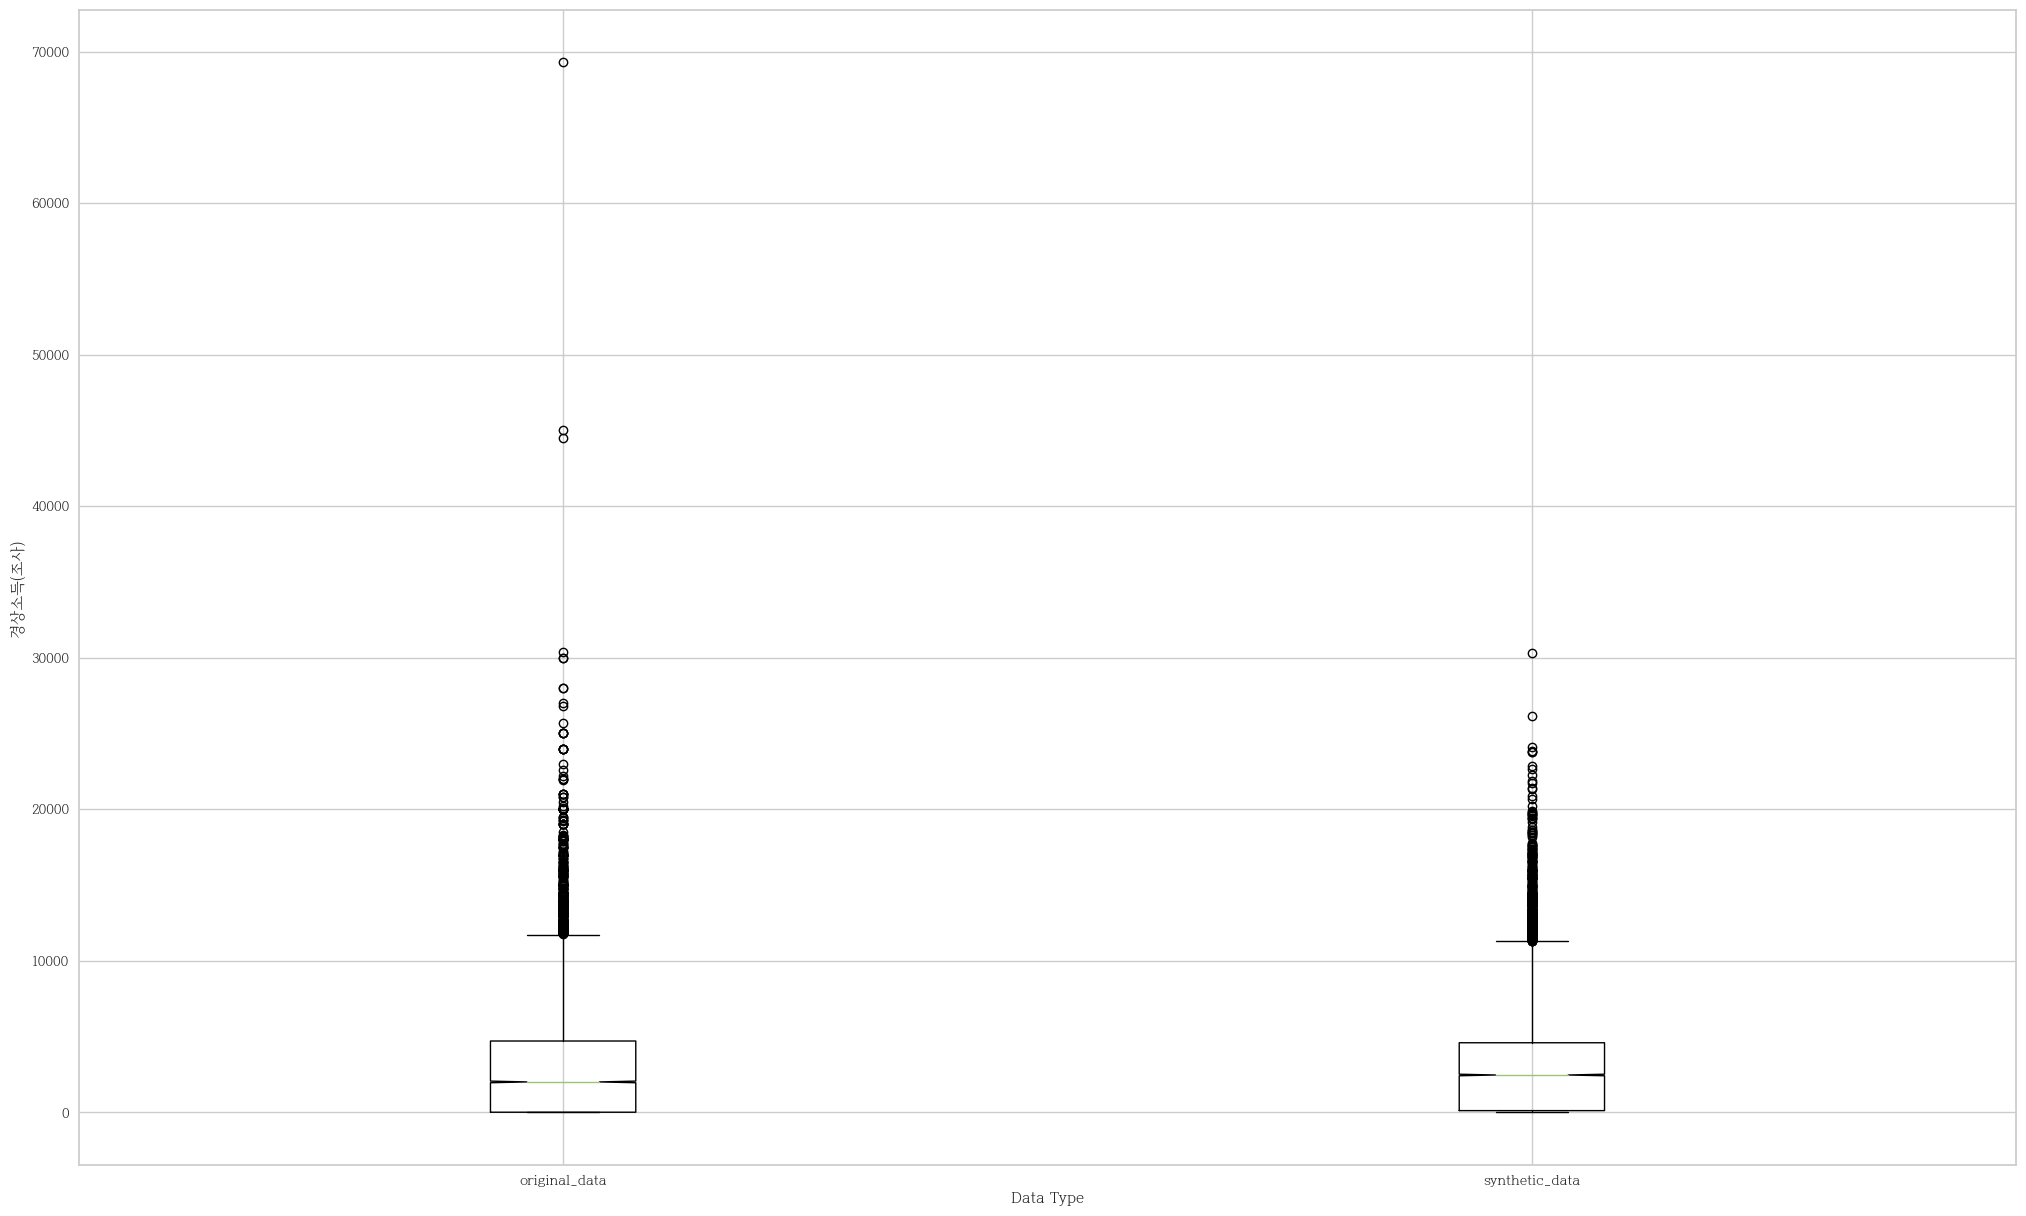

In [224]:
plt.rcParams['figure.figsize'] = [25, 15]
fig, ax = plt.subplots()
ax.boxplot([all_oridata['경상소득_근로소득(조사)'],all_group['경상소득_근로소득(조사)']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('경상소득(조사)')
plt.xticks([1,2], ['original_data','synthetic_data'])

([<matplotlib.axis.XTick at 0x2c0c68020d0>,
 [Text(1, 0, 'original_data'), Text(2, 0, 'synthetic_data')])

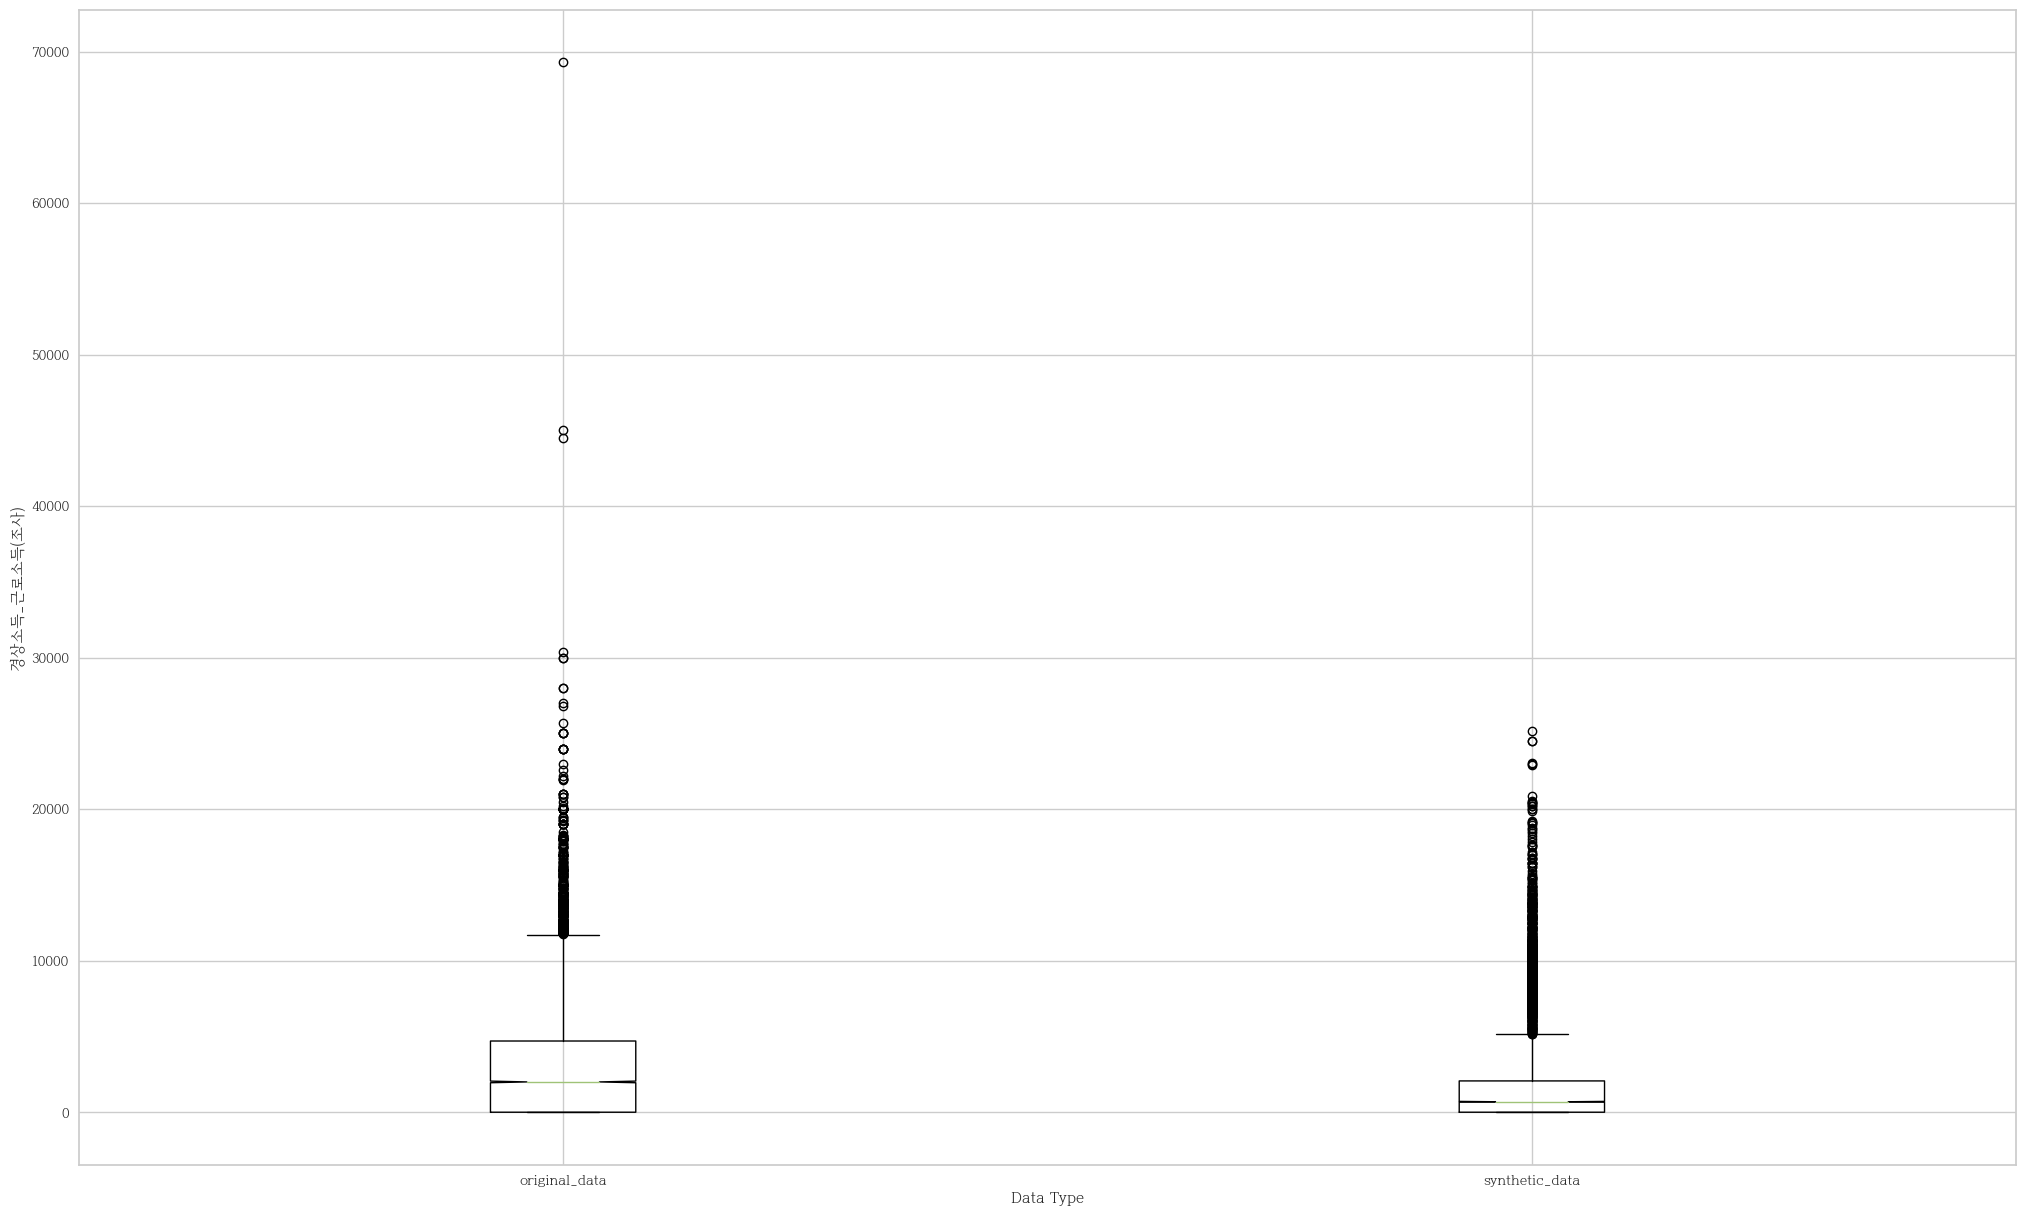

In [225]:
plt.rcParams['figure.figsize'] = [25, 15]
fig, ax = plt.subplots()
ax.boxplot([all_oridata['경상소득_근로소득(조사)'],except_group['경상소득_근로소득(조사)']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('경상소득_근로소득(조사)')
plt.xticks([1,2], ['original_data','synthetic_data'])

([<matplotlib.axis.XTick at 0x2c0c6885790>,
 [Text(1, 0, 'original_data'), Text(2, 0, 'synthetic_data')])

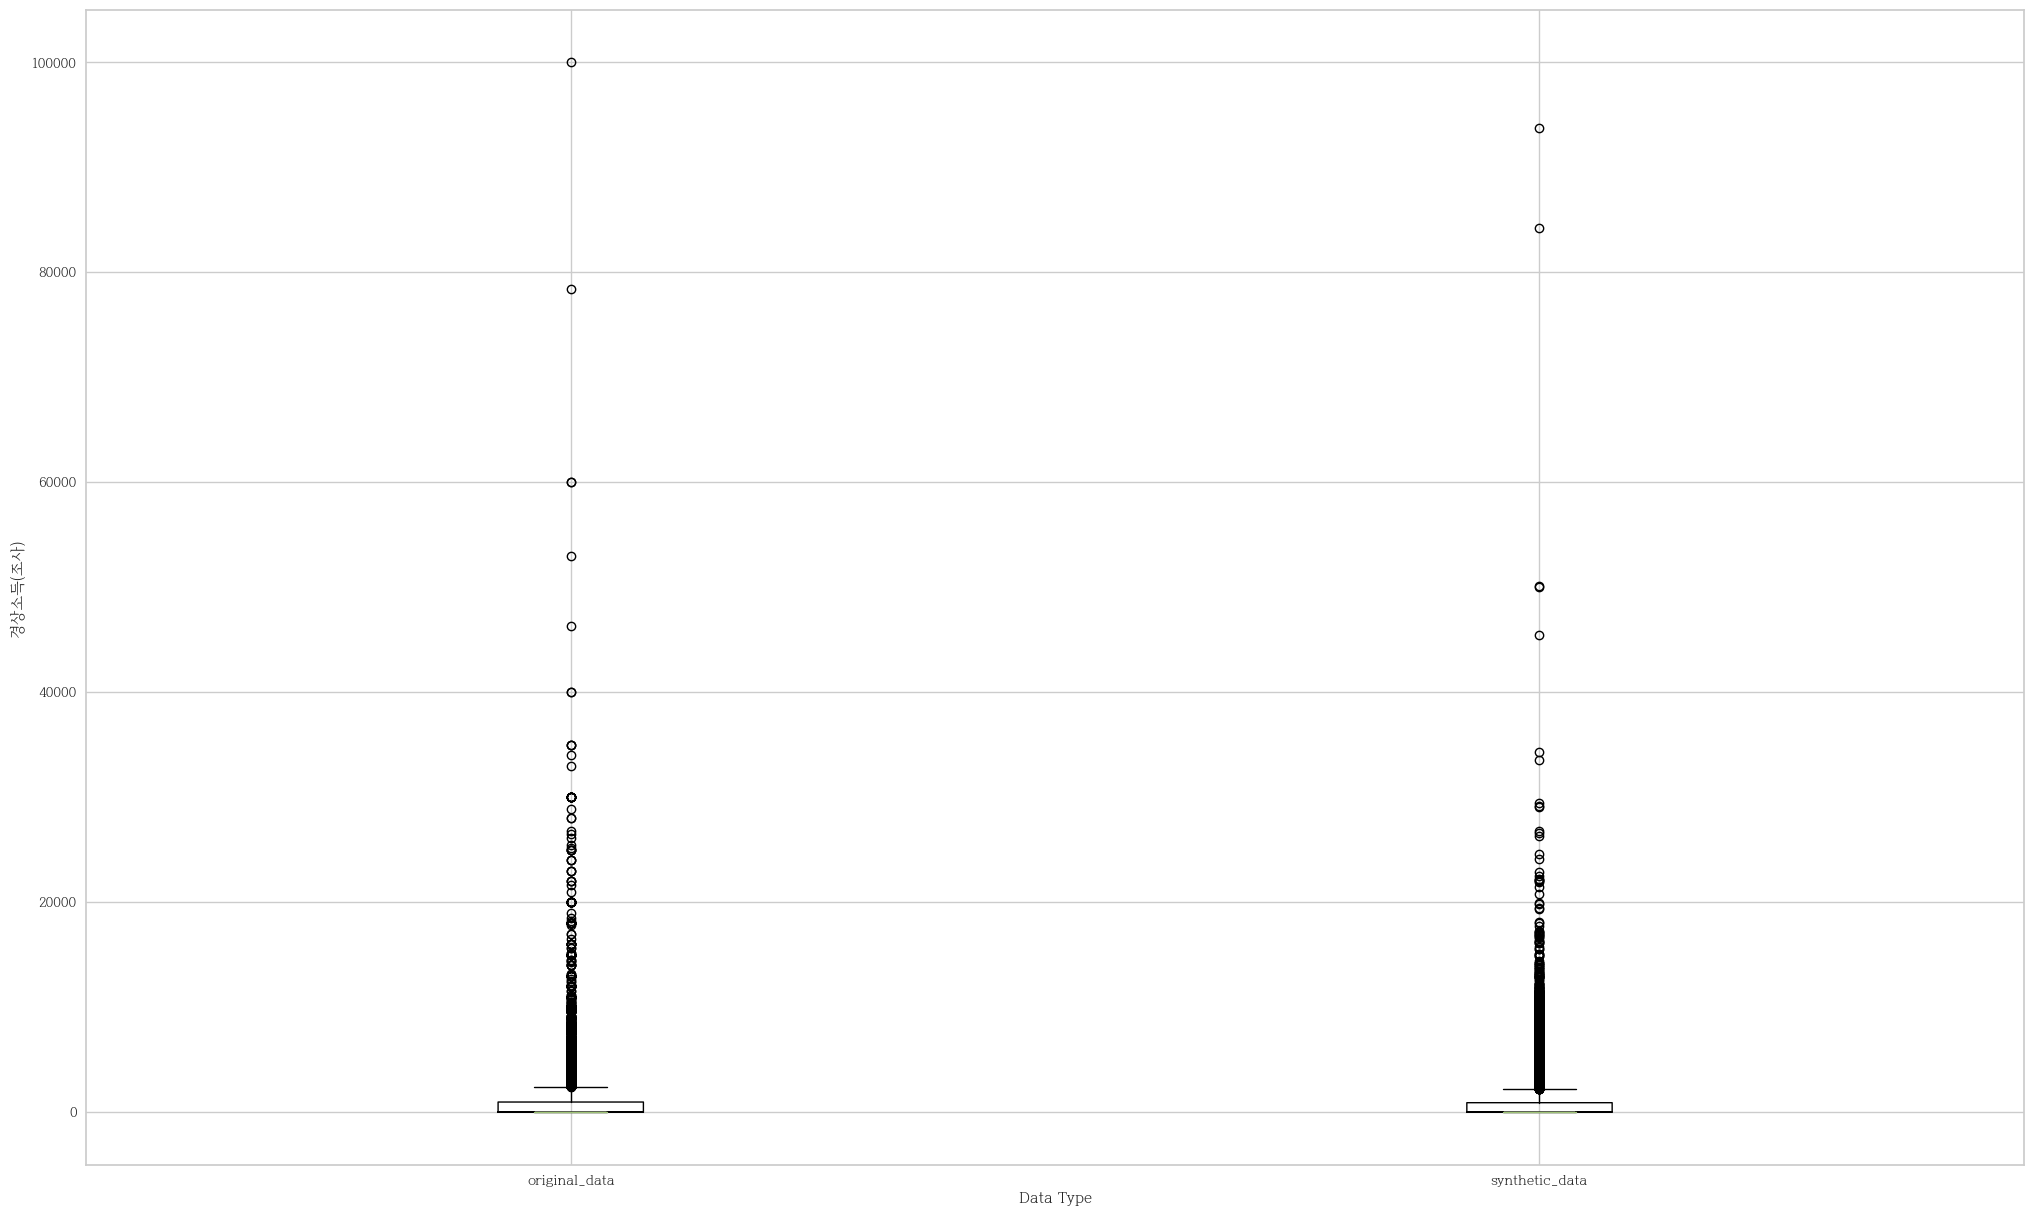

In [226]:
plt.rcParams['figure.figsize'] = [25, 15]
fig, ax = plt.subplots()
ax.boxplot([all_oridata['경상소득_사업소득(조사)'],all_group['경상소득_사업소득(조사)']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('경상소득(조사)')
plt.xticks([1,2], ['original_data','synthetic_data'])

([<matplotlib.axis.XTick at 0x2c0c6902b20>,
 [Text(1, 0, 'original_data'), Text(2, 0, 'synthetic_data')])

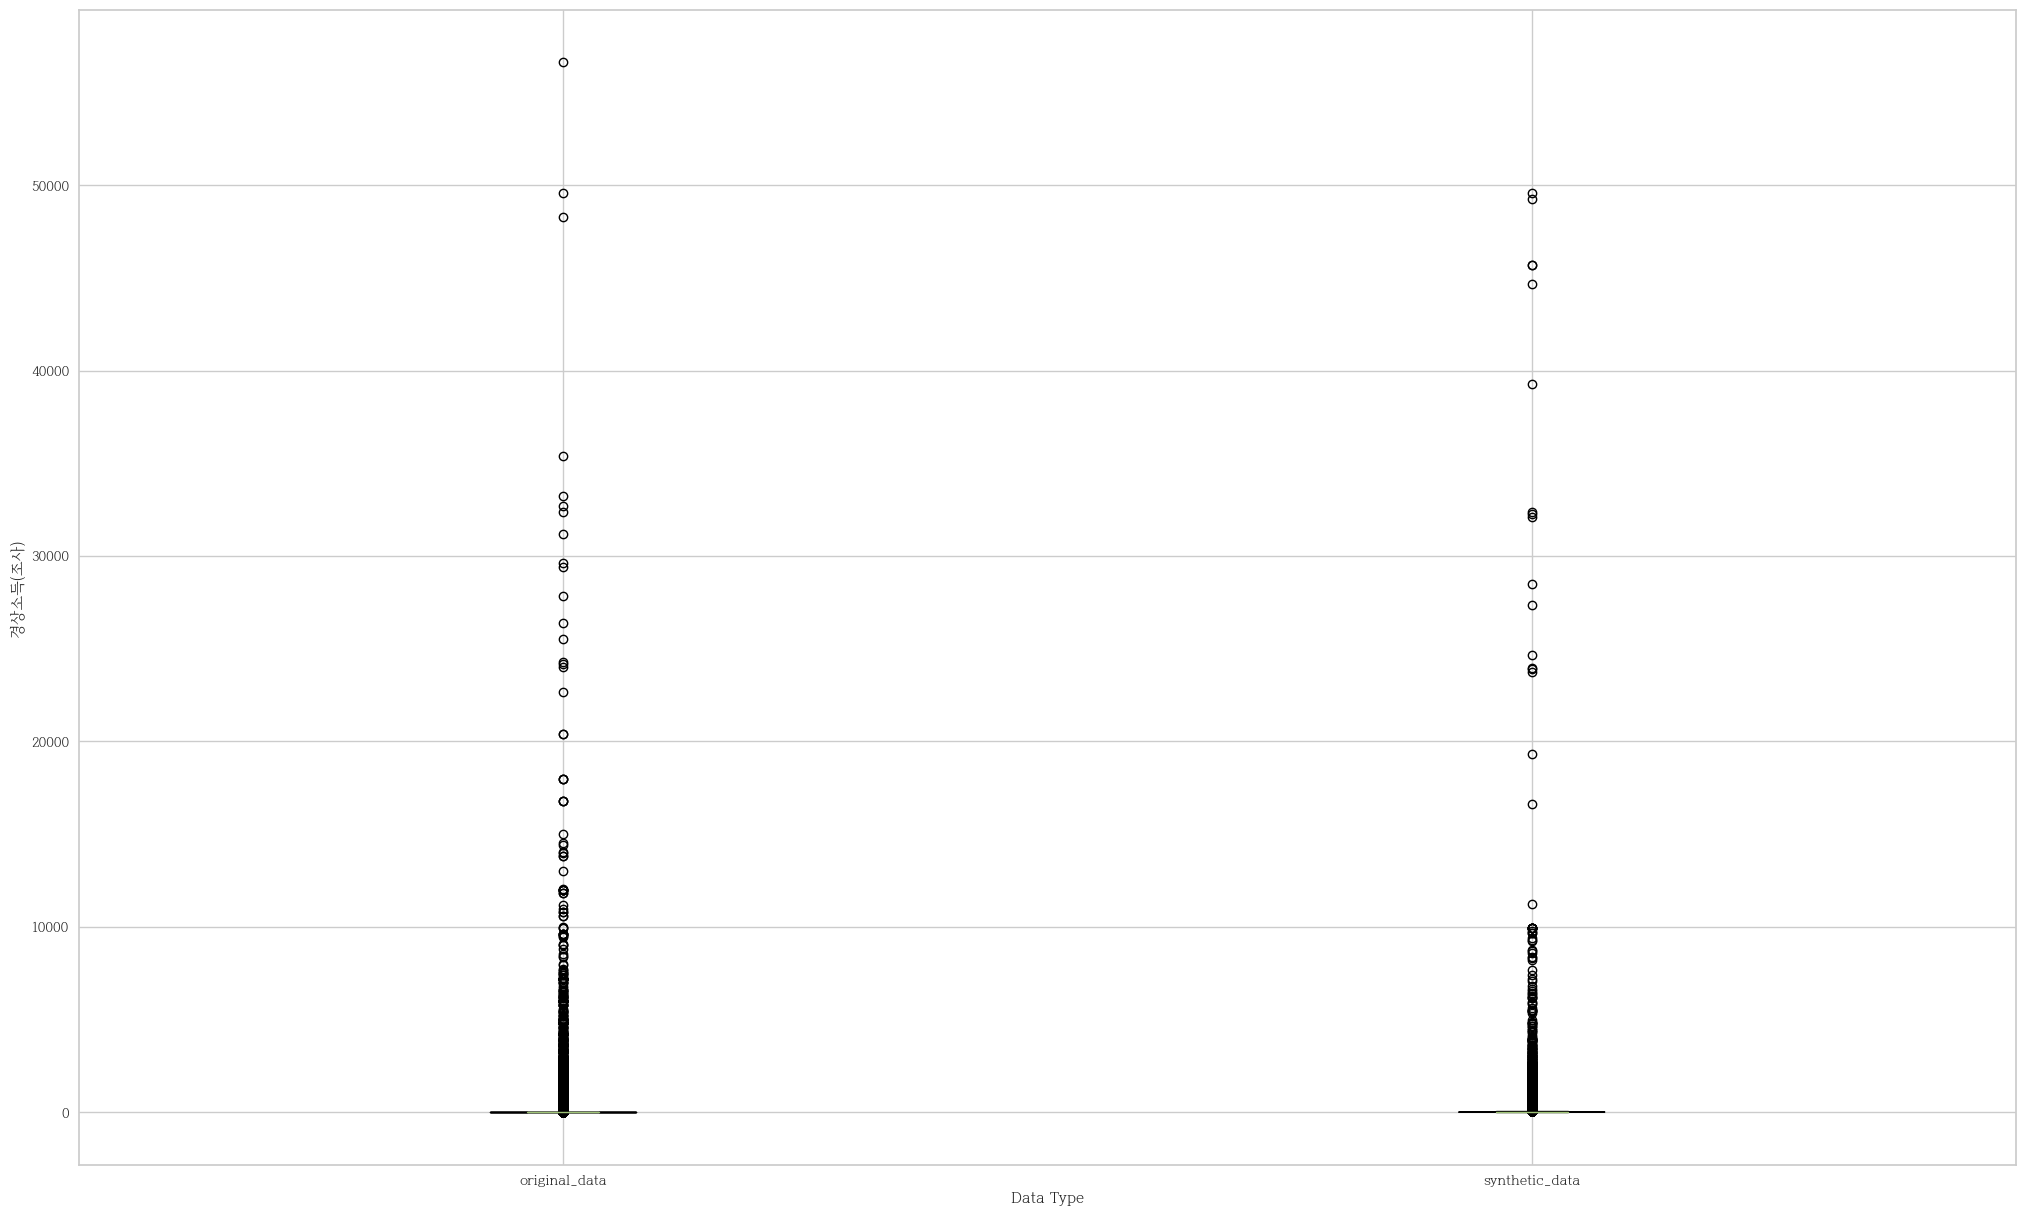

In [227]:
plt.rcParams['figure.figsize'] = [25, 15]
fig, ax = plt.subplots()
ax.boxplot([all_oridata['경상소득_재산소득(조사)'],all_group['경상소득_재산소득(조사)']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('경상소득(조사)')
plt.xticks([1,2], ['original_data','synthetic_data'])

Text(0.5, 1.0, '전체재현자료')

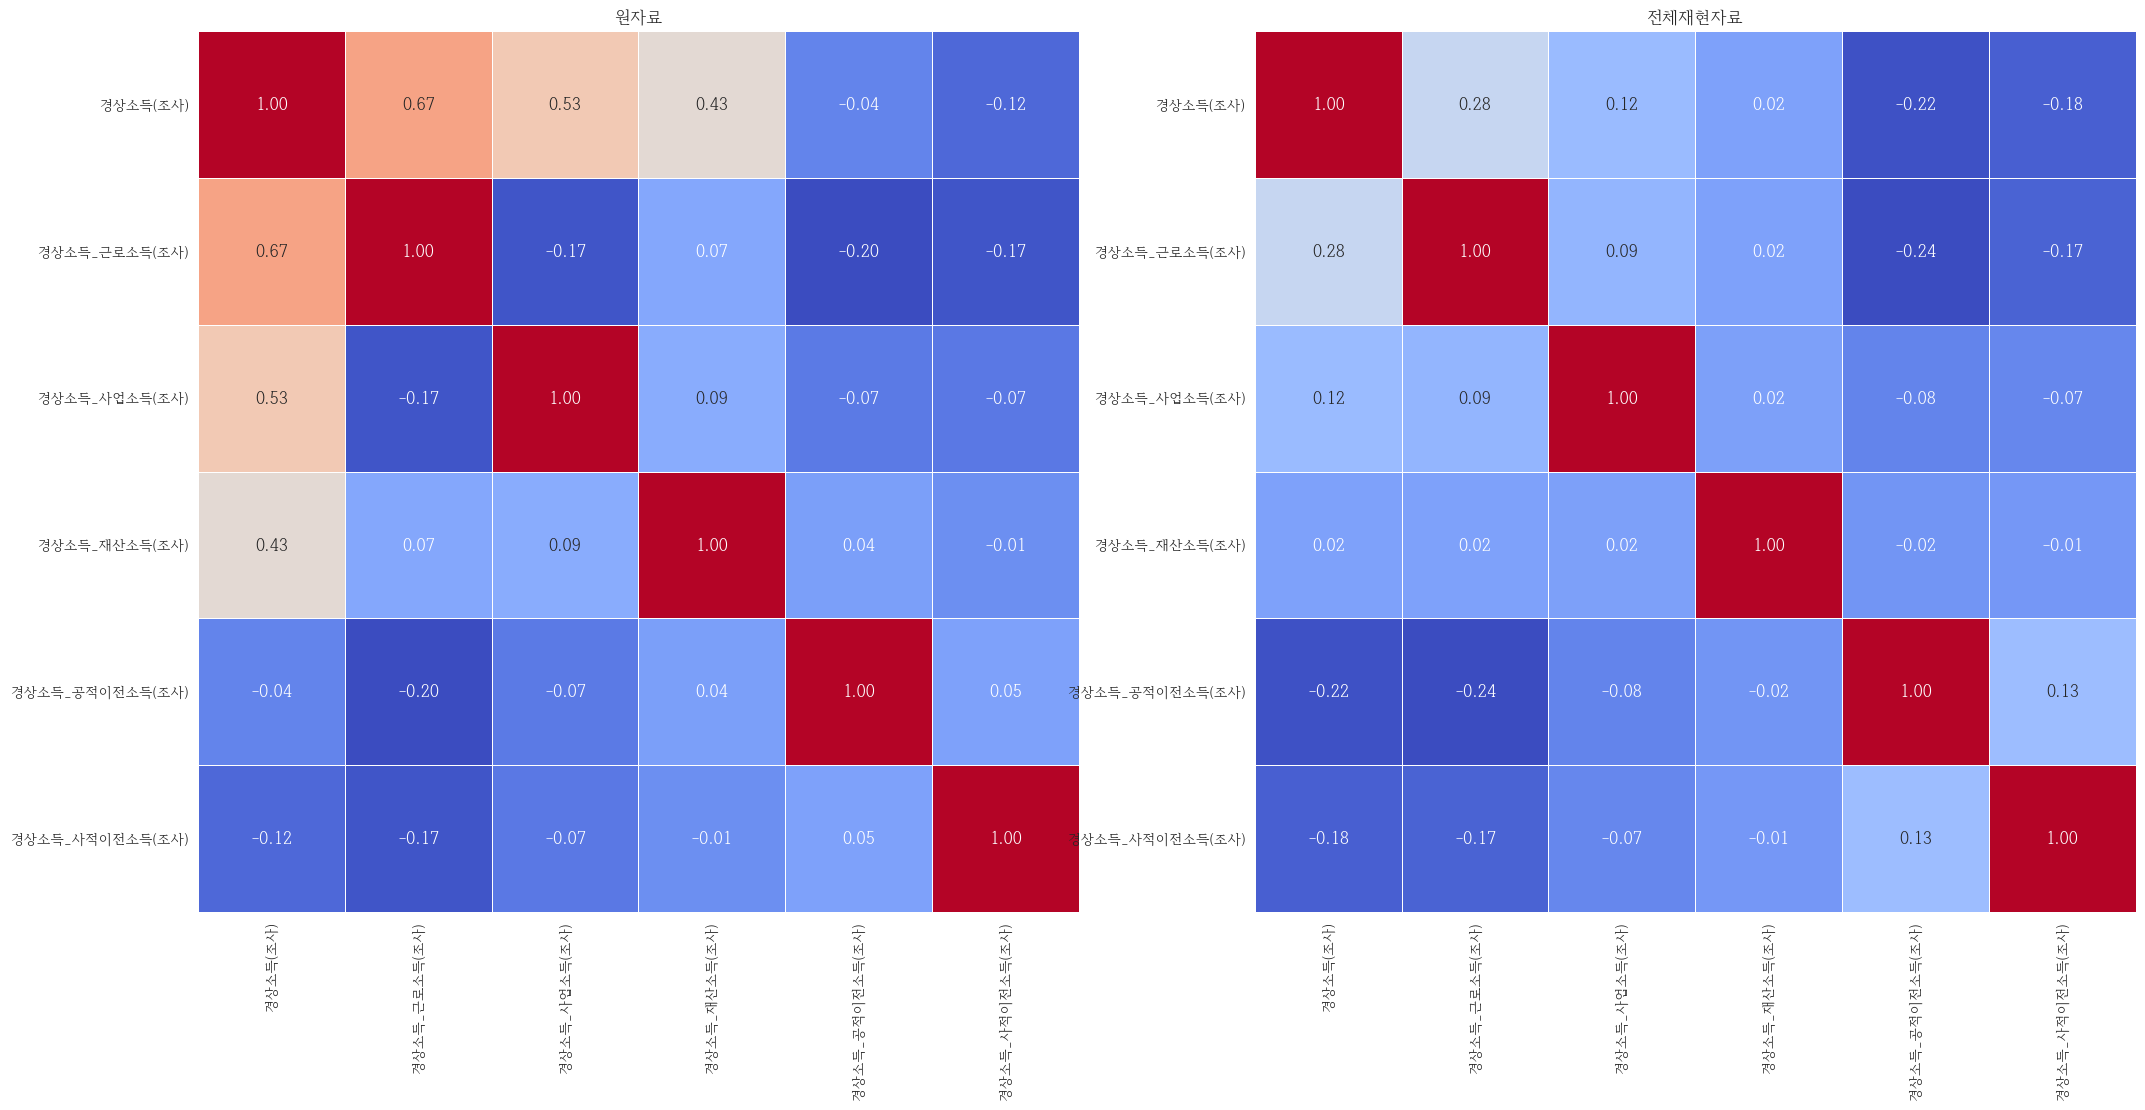

In [228]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(all_oridata.iloc[:,5:11].corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True , cbar = False)
plt.title("원자료")

plt.subplot(1,2,2)
sns.heatmap(all_synthetic_sample.iloc[:,5:11].corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar = False)
plt.title("전체재현자료")

Text(0.5, 1.0, '전체재현자료')

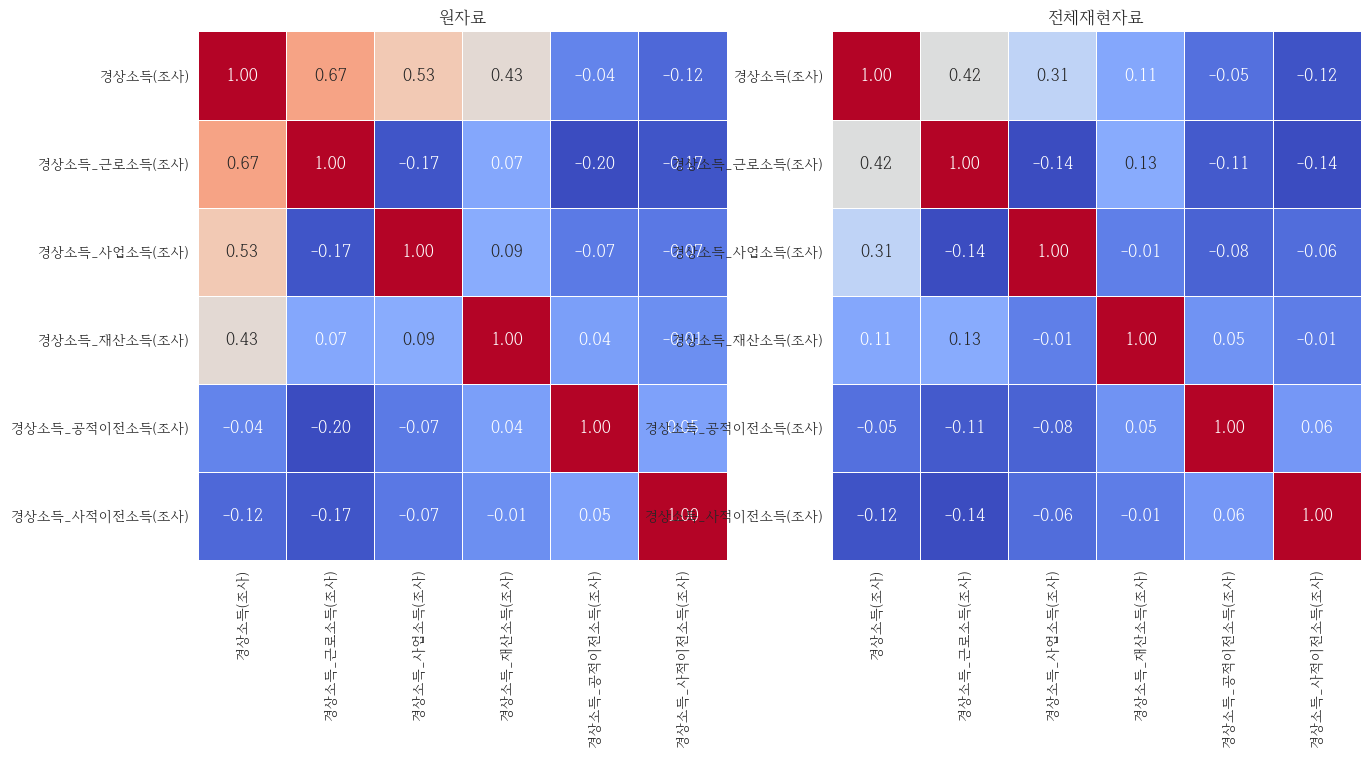

In [229]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(all_oridata.iloc[:,5:11].corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True , cbar = False)
plt.title("원자료")

plt.subplot(1,2,2)
sns.heatmap(all_group.iloc[:,5:11].corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar = False)
plt.title("전체재현자료")

Text(0.5, 1.0, '전체재현자료')

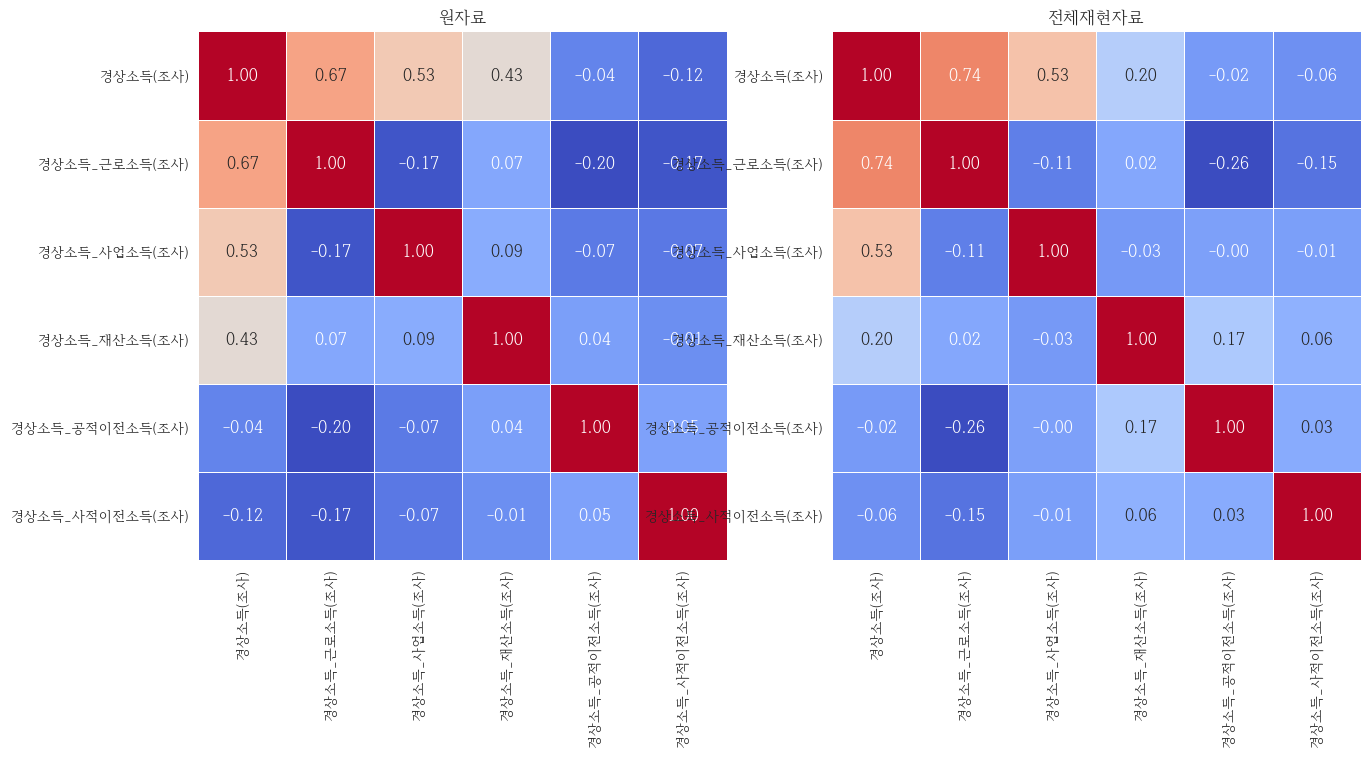

In [253]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(all_oridata.iloc[:,5:11].corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True , cbar = False)
plt.title("원자료")

plt.subplot(1,2,2)
sns.heatmap(except_group[['경상소득(조사)', "경상소득_근로소득(조사)" , "경상소득_사업소득(조사)", "경상소득_재산소득(조사)" , "경상소득_공적이전소득(조사)" , "경상소득_사적이전소득(조사)"]].corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar = False)
plt.title("전체재현자료")

In [232]:
# 두 가지 feature를 대상
non_data = non_ori_num_data

# 정규화 진행
scaler = MinMaxScaler()
non_data_scale = scaler.fit_transform(non_data)

In [233]:
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(non_data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
all_oridata['cluster'] = model.fit_predict(non_data_scale)


In [234]:
except_income = all_oridata.loc[:,(all_oridata.columns != '경상소득(조사)')]

In [236]:
except_income_group1 = except_income[except_income['cluster'] == 0]
except_income_group2 = except_income[except_income['cluster'] == 1]
except_income_group3 = except_income[except_income['cluster'] == 2]
except_income_group4 = except_income[except_income['cluster'] == 3]
except_income_group5 = except_income[except_income['cluster'] == 4]

In [238]:
start = time.time()
myepoch = 40
    
sampling_count = len(except_income_group1) 
except_synthetic_data_group1 = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
except_synthetic_data_group1.fit(except_income_group1)  
except_synthetic_sample_group1 = except_synthetic_data_group1.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

15.47828 sec


In [239]:
start = time.time()
myepoch = 40
    
sampling_count = len(except_income_group2) 
except_synthetic_data_group2 = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
except_synthetic_data_group2.fit(except_income_group2)  
except_synthetic_sample_group2 = except_synthetic_data_group2.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

14.88800 sec


In [240]:
start = time.time()
myepoch = 40
    
sampling_count = len(except_income_group3) 
except_synthetic_data_group3 = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
except_synthetic_data_group3.fit(except_income_group3)  
except_synthetic_sample_group3 = except_synthetic_data_group3.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

2.10138 sec


In [241]:
start = time.time()
myepoch = 40
    
sampling_count = len(except_income_group4) 
except_synthetic_data_group4 = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
except_synthetic_data_group4.fit(except_income_group4)  
except_synthetic_sample_group4 = except_synthetic_data_group4.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

1.99367 sec


In [242]:
start = time.time()
myepoch = 40
    
sampling_count = len(except_income_group5) 
except_synthetic_data_group5 = CTGAN(primary_key='MD제공용_가구고유번호', epochs = myepoch, batch_size = 400)
except_synthetic_data_group5.fit(except_income_group5)  
except_synthetic_sample_group5 = except_synthetic_data_group5.sample(num_rows = sampling_count)
        
end = time.time()

print(f"{end - start:.5f} sec")
    

39.51301 sec


In [243]:
except_group = pd.concat([except_synthetic_sample_group1 , except_synthetic_sample_group2 , except_synthetic_sample_group3 , except_synthetic_sample_group4 , except_synthetic_sample_group5] , axis=0)

In [244]:
except_group

,MD제공용_가구고유번호,수도권여부,가구주_성별코드,가구주_교육정도_학력코드,가구주_연령10세단위코드,경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사),cluster
0,0,G1,1,1,G5,0,82,0,544,1,0
1,1,G2,2,5,G4,0,48,0,714,141,0
2,2,G1,1,5,G4,0,1057,0,1368,7,0
3,3,G2,1,4,G5,0,2713,0,276,0,0
4,4,G1,1,1,G3,0,2715,0,504,267,0
...,...,...,...,...,...,...,...,...,...,...,...
9842,9842,G1,1,6,G3,110,103,6,0,564,4
9843,9843,G2,2,3,G4,4522,3304,10,267,0,4
9844,9844,G1,1,2,G5,0,10,0,309,1,4
9845,9845,G2,1,4,G4,20,0,0,0,0,4


In [247]:
except_group['경상소득(조사)'] = except_group.iloc[:,5:10].sum(axis = 1)

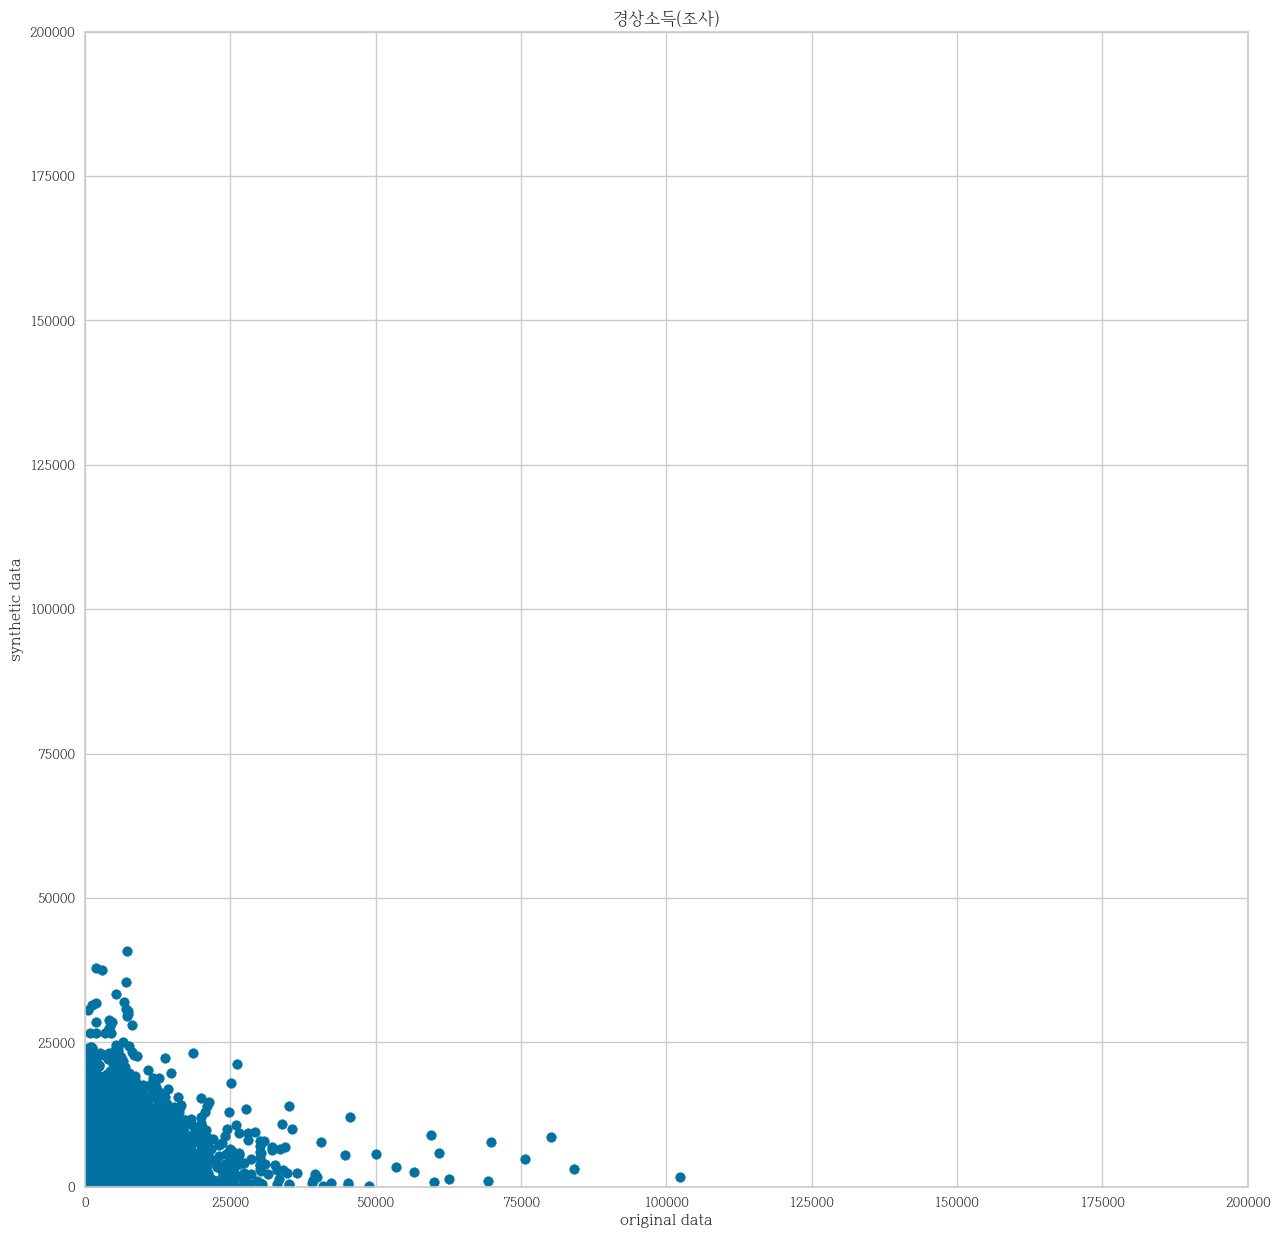

In [248]:
plt.scatter(all_oridata['경상소득(조사)'],except_group['경상소득(조사)'])
plt.title('경상소득(조사)')
plt.xlim(0,200000)
plt.ylim(0,200000)
plt.xlabel("original data")
plt.ylabel("synthetic data")
plt.show()

([<matplotlib.axis.XTick at 0x2c0c051aa00>,
 [Text(1, 0, 'original_data'), Text(2, 0, 'synthetic_data')])

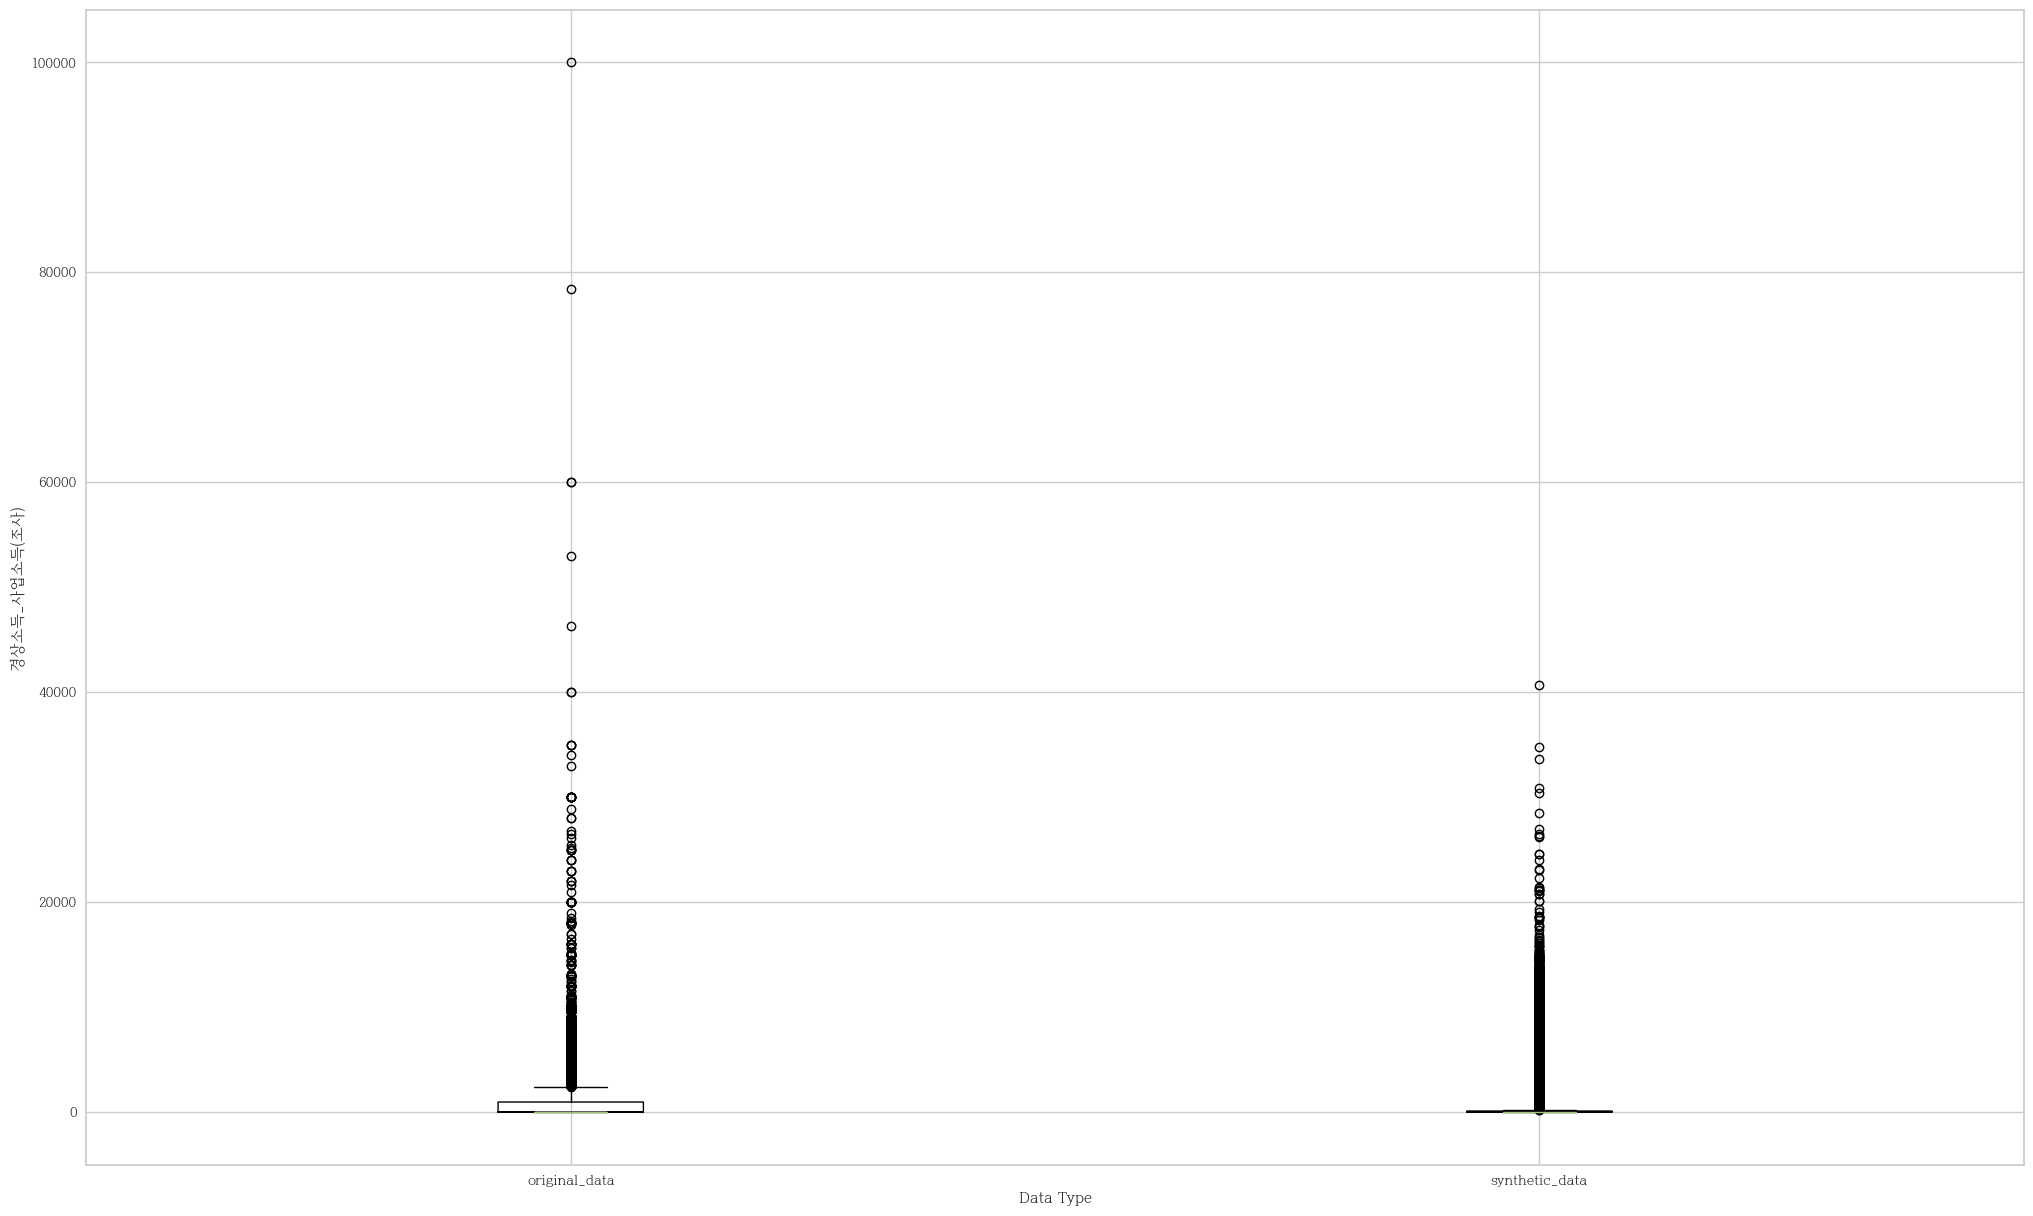

In [249]:
plt.rcParams['figure.figsize'] = [25, 15]
fig, ax = plt.subplots()
ax.boxplot([all_oridata['경상소득_사업소득(조사)'],except_group['경상소득_사업소득(조사)']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('경상소득_사업소득(조사)')
plt.xticks([1,2], ['original_data','synthetic_data'])

([<matplotlib.axis.XTick at 0x2c0c2dd5430>,
 [Text(1, 0, 'original_data'), Text(2, 0, 'synthetic_data')])

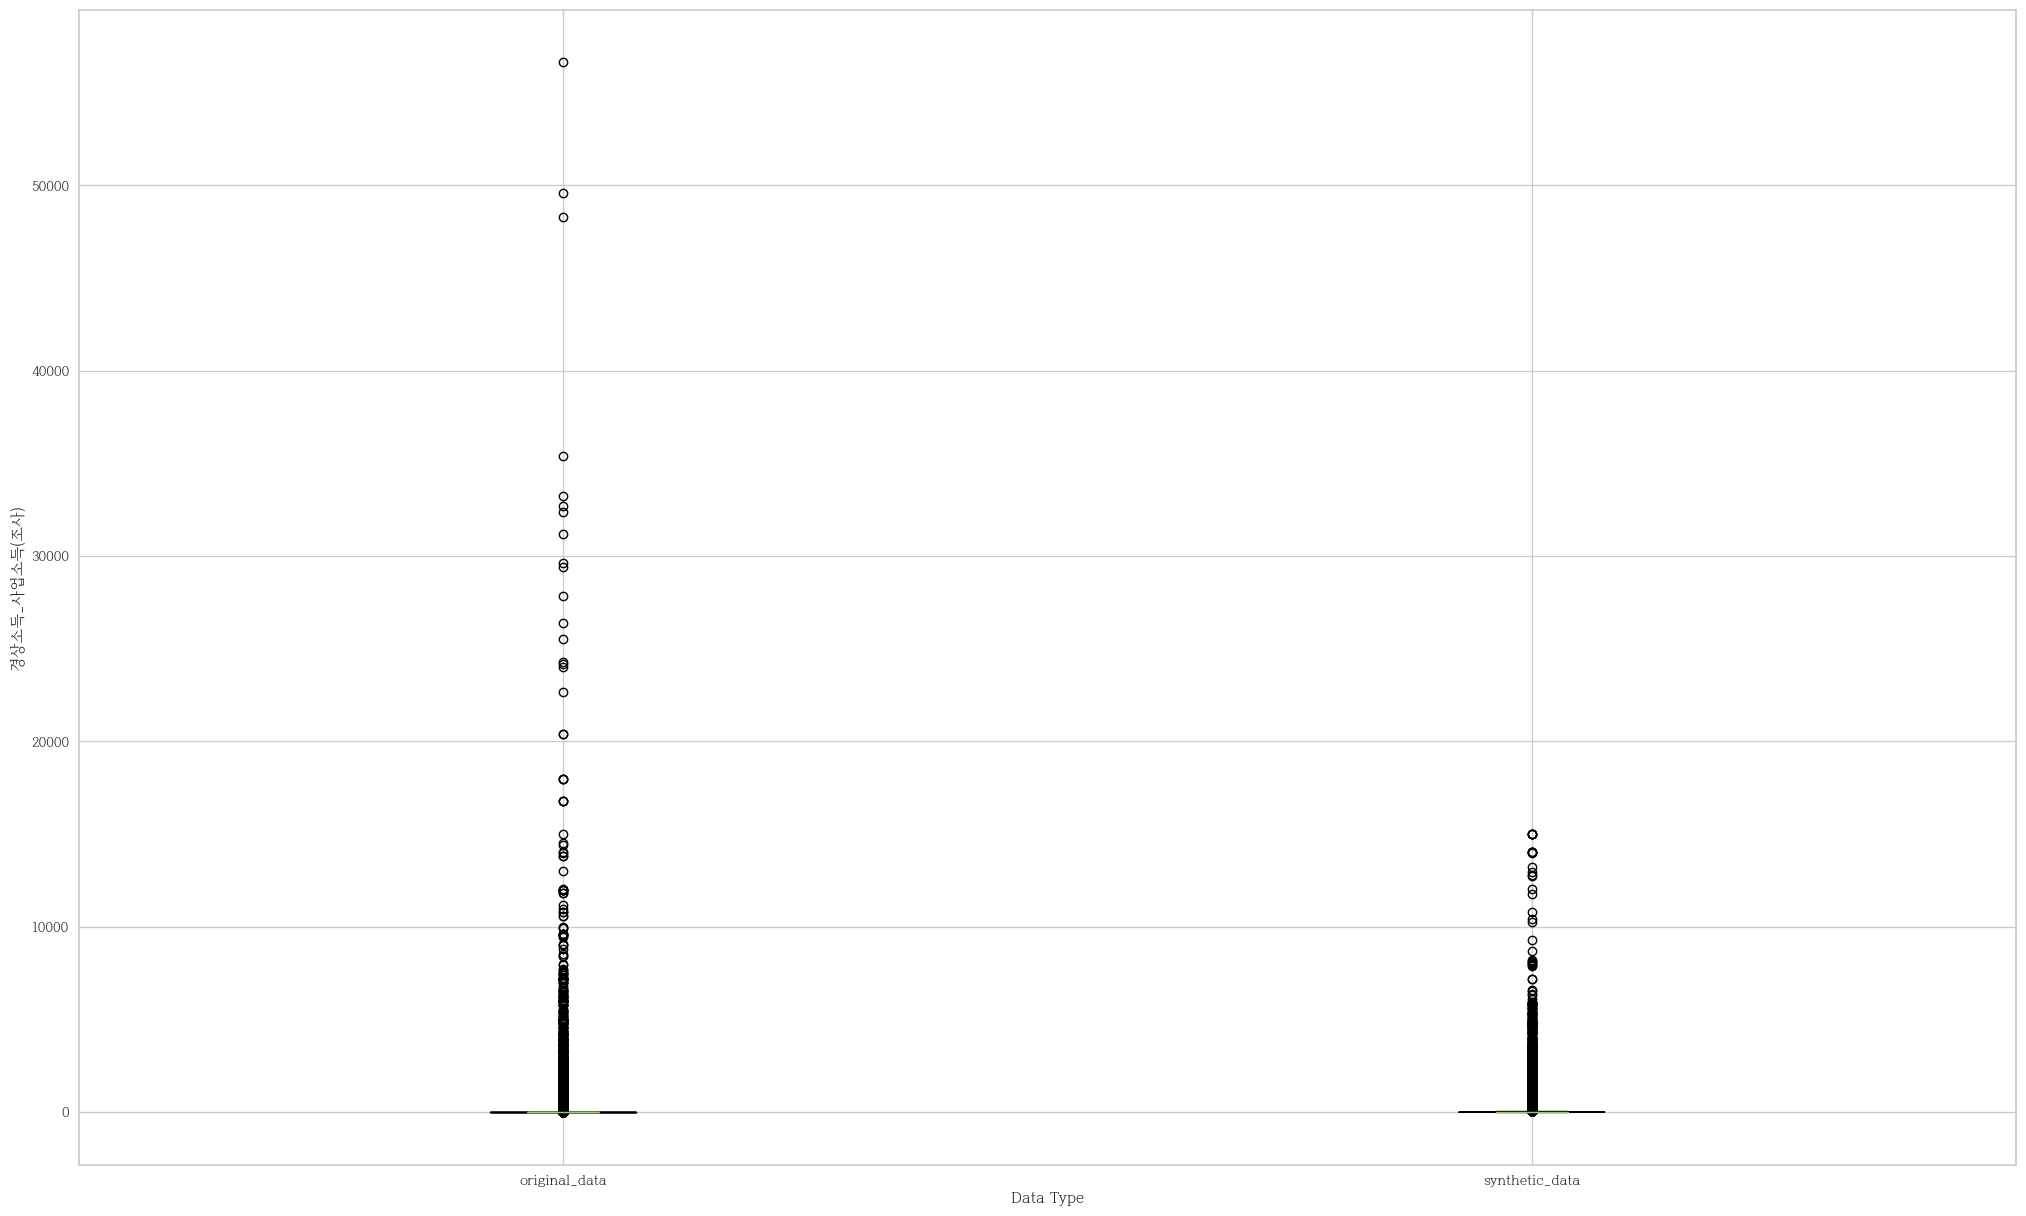

In [250]:
plt.rcParams['figure.figsize'] = [25, 15]
fig, ax = plt.subplots()
ax.boxplot([all_oridata['경상소득_재산소득(조사)'],except_group['경상소득_재산소득(조사)']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('경상소득_사업소득(조사)')
plt.xticks([1,2], ['original_data','synthetic_data'])

Text(0.5, 1.0, '전체재현자료')

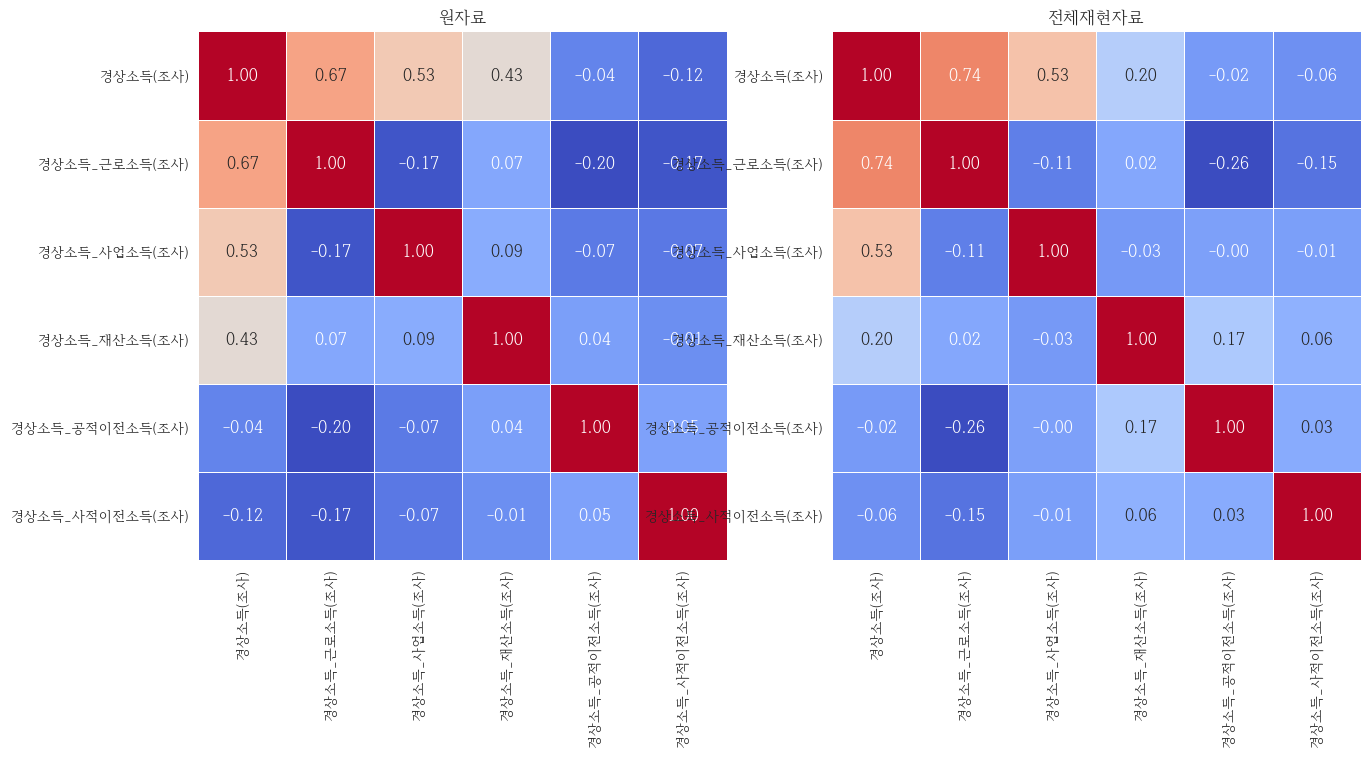

In [252]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(all_oridata.iloc[:,5:11].corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True , cbar = False)
plt.title("원자료")

plt.subplot(1,2,2)
sns.heatmap(except_group[['경상소득(조사)', "경상소득_근로소득(조사)" , "경상소득_사업소득(조사)", "경상소득_재산소득(조사)" , "경상소득_공적이전소득(조사)" , "경상소득_사적이전소득(조사)"]].corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar = False)
plt.title("전체재현자료")